In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd

global count
global count2
count = 0
count2 =0

In [2]:
class Metropolis:
    def __init__(self,L,J=1,B=0,isTinf=False):
        self.L = L
        self.N = L*L
        self.J = J
        self.B = B
        count1 = 0
        count2 = 0
        
        self.sc = np.ones(self.N,dtype=np.int0)
        if(isTinf):
            self.sc = np.array([1-(int)(np.random.rand()*2)*2 for i in range(self.N)],dtype=np.int0)
        self.prob = np.zeros(2,dtype=np.double)

    def prob_calc(self,beta):
        for i in range(2):
            # 4 8
            self.prob[i] = np.exp(-beta*4*(i+1))

    def measure(self,func):
        res = 0
        # print(self.sc)
        for i in range(self.N):
            sum = func(i)
            res += self.J*sum*self.sc[i]

        sigma = np.sum(self.sc)
        HH = -res -self.B*sigma

        return sigma, HH

    def helical(self,i):
        sum = 0

        nn = i + 1
        if(nn == self.N): nn = 0
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    
    def sweep_pbc(self,i):
        sum = 0

        nn = i -1
        if((nn+1 % self.L) == 0) : nn += self.L
        sum += self.sc[nn]

        nn = i + 1
        if(nn % self.L == 0): nn -= self.L
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum
    
    def sweep_helical(self,i):
        sum = 0

        nn = i -1
        if(nn < 0) : nn += self.N
        sum += self.sc[nn]

        nn = i + 1
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    def calculate(self,random=False):
        global count, count2
        for i in range(self.N):
            if(random):
                k = np.random.randint(0,self.N-1)
            elif (self.N%2 ==0):
                k = 2*i
                if(k < self.N): k = k if int(k/self.L)%2 ==0 else k+1
                else:
                    k -= self.N
                    k = k+1 if int(k/self.L)%2 ==0 else k
            else:
                k = 2*i if 2*i < self.N else 2*i-self.N
            # print(k,'')

            # delta = Enew - Eold
            delta = 2*self.sc[k]*self.J*self.sweep_helical(k)
            count2 += 1
            # print(delta)
            if(delta <= 0): # A = 1
                count += 1
                self.sc[k] *= -1
            elif(np.random.rand() < self.prob[int(delta/4)-1]): #flip
                # print(delta, self.prob[int(delta/4)-1])
                count += 1
                self.sc[k] *= -1
        return 2*self.sc[k], delta

    def calculate2(self,random=False):
        global count, count2
        for i in range(self.N):
            k = i ## 순서대로 하고 있었네?
            if(random):
                k = np.random.randint(self.N)
            # delta = Enew - Eold
            delta = 2*self.sc[k]*self.J*self.sweep_pbc(k)
            count2 += 1
            # print(delta)
            if(delta <= 0): # A = 1
                count += 1
                self.sc[k] *= -1
            elif(np.random.rand() < self.prob[int(delta/4)-1]): #flip
                # print(delta, self.prob[int(delta/4)-1])
                count += 1
                self.sc[k] *= -1
        return 2*self.sc[k], delta

cnt = 20
cnt = 40
cnt = 80
cnt = 120
cnt = 200
cnt = 400
cnt = 800
cnt = 2000


<Figure size 3600x2400 with 0 Axes>

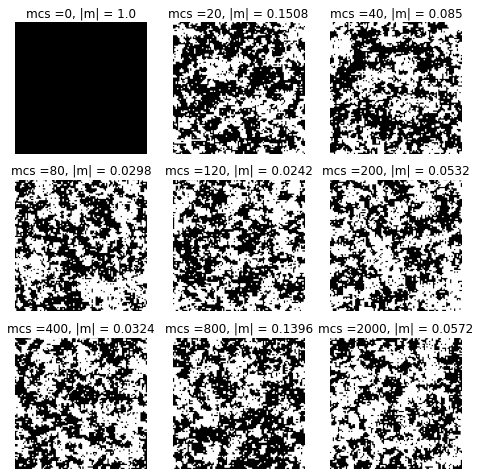

In [3]:
# Figure for equilibrium
T11 = Metropolis(100)
T = 2.6
T11.prob_calc(1/T)
ls , epoch = np.array([10,20,40,60,100,200,400,1000,10000]), 1000
ls , epoch = 2*ls, 2*epoch
# ls = [1,2,4,6,10,20,40,100,1000]
cnt = 0
plt.figure(dpi=600)
plt.figure(figsize=(8,8))
# plt.subplots(constrained_layout=True)
plt.subplot(3,3,1,aspect='equal')
plt.axis('off')
a = np.reshape(T11.sc,(T11.L,T11.L))
plt.title("mcs =" + "0" +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
plt.imshow(a,cmap="gray")

for i in range(epoch+1):
    if(i == ls[cnt]):
        cnt += 1
        plt.subplot(3,3,cnt+1)
        plt.axis('off')
        a = np.reshape(T11.sc,(T11.L,T11.L))
        plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
    T11.calculate()
plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
# plt.subplot_tool()
plt.show()

cnt = 30
cnt = 60
cnt = 120
cnt = 180
cnt = 300
cnt = 600
cnt = 1200
cnt = 3000


<Figure size 3600x2400 with 0 Axes>

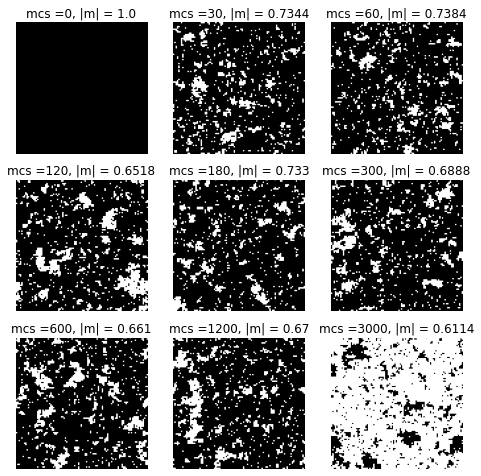

In [4]:
# Figure for equilibrium
T11 = Metropolis(100)
T = 2.27
T11.prob_calc(1/T)
ls , epoch = np.array([10,20,40,60,100,200,400,1000,10000]), 1000
ls , epoch = 3*ls, 3*epoch
# ls = [1,2,4,6,10,20,40,100,1000]
cnt = 0
plt.figure(dpi=600)
plt.figure(figsize=(8,8))
# plt.subplots(constrained_layout=True)
plt.subplot(3,3,1,aspect='equal')
plt.axis('off')
a = np.reshape(T11.sc,(T11.L,T11.L))
plt.title("mcs =" + "0" +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
plt.imshow(a,cmap="gray")

for i in range(epoch+1):
    if(i == ls[cnt]):
        cnt += 1
        plt.subplot(3,3,cnt+1)
        plt.axis('off')
        a = np.reshape(T11.sc,(T11.L,T11.L))
        plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
    T11.calculate()
plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
# plt.subplot_tool()
plt.show()

cnt = 20
cnt = 40
cnt = 80
cnt = 120
cnt = 200
cnt = 400
cnt = 800
cnt = 2000


<Figure size 3600x2400 with 0 Axes>

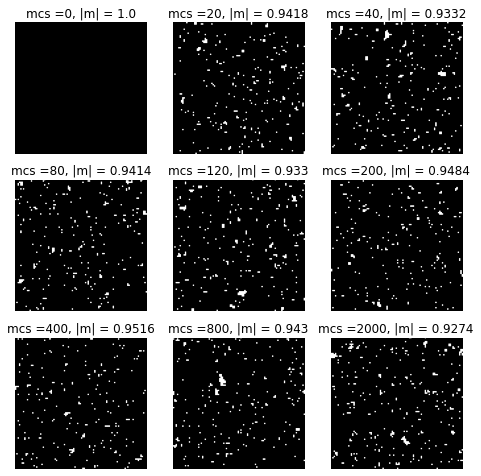

In [5]:
# Figure for equilibrium
T11 = Metropolis(100)
T = 1.9
T11.prob_calc(1/T)
ls , epoch = np.array([10,20,40,60,100,200,400,1000,10000]), 1000
ls , epoch = 2*ls, 2*epoch
# ls = [1,2,4,6,10,20,40,100,1000]
cnt = 0
plt.figure(dpi=600)
plt.figure(figsize=(8,8))
# plt.subplots(constrained_layout=True)
plt.subplot(3,3,1,aspect='equal')
plt.axis('off')
a = np.reshape(T11.sc,(T11.L,T11.L))
plt.title("mcs =" + "0" +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
plt.imshow(a,cmap="gray")

for i in range(epoch+1):
    if(i == ls[cnt]):
        cnt += 1
        plt.subplot(3,3,cnt+1)
        plt.axis('off')
        a = np.reshape(T11.sc,(T11.L,T11.L))
        plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
    T11.calculate()
plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
# plt.subplot_tool()
plt.show()

In [6]:
# # Figure for equilibrium
# T11 = Metropolis(100)
# T = 1.9
# T11.prob_calc(1/T)
# ls = [10,20,40,60,100,200,400,1000,10000]
# # ls = [1,2,4,6,10,20,40,100,1000]
# cnt = 0
# plt.figure(dpi=600)
# plt.figure(figsize=(8,8))
# # plt.subplots(constrained_layout=True)
# plt.subplot(3,3,1,aspect='equal')
# plt.axis('off')
# a = np.reshape(T11.sc,(T11.L,T11.L))
# plt.title("mcs = 0")
# plt.imshow(a,cmap="gray")

# for i in range(1001):
#     if(i == ls[cnt]):
#         cnt += 1
#         plt.subplot(3,3,cnt+1)
#         plt.axis('off')
#         a = np.reshape(T11.sc,(T11.L,T11.L))
#         plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc))))
#         plt.imshow(a,cmap="Greys")
#         print("cnt =",ls[cnt-1])
#     T11.calculate()
# plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
# # plt.subplot_tool()
# plt.show()

In [7]:
# temp = Metropolis(100)
# temp.prob_calc(1/(2.4)) #beta = T^-1
# ls = [10,20,40,60,100,200,400,1000,2000,3000,4000,10000,100000]
# cnt = 0
# a = np.reshape(temp.sc,(temp.L,temp.L))
# plt.imshow(a,cmap="gray")
# plt.show()

# for i in range(4001):
#     if(i == ls[cnt]):
#         cnt += 1
#         a = np.reshape(temp.sc,(temp.L,temp.L))
#         plt.imshow(a,cmap="Greys")
#         print("cnt =",ls[cnt-1])
#         plt.show()
#     temp.calculate()

In [8]:
# T = np.zeros(25,dtype=np.double)
# m = np.zeros(25,dtype=np.double)
# c = np.zeros(25,dtype=np.double)


# for i in range(25):
#     T[i] = 0.2*(i+1)

# for j in range(25):
#     count = 0
#     count2 = 0
#     M55 = Metropolis(5)
#     M55.prob_calc(1/T[j])
#     res = np.zeros(4,dtype=np.double)
#     for i in range(20000):
#         M55.calculate()
#     sigma, HH = M55.measure(M55.helical)
#     print("idx: ", j, "||",sigma,HH)
#     for i in range(180000):
#         M55.calculate()
#         sigma, HH = M55.measure(M55.helical)
#         res += np.array([np.absolute(sigma), sigma*sigma, HH, HH*HH])
#     res /= 18000 
#     m[j] = res[0]/M55.N
#     c[j] = (1/T[j])**2*(res[3]-res[2]**2)/M55.N
#     print(res)
#     print(m[j],c[j],count, count2)
#     print(M55.prob)


In [9]:
# bin = 40
# T = np.zeros(bin,dtype=np.double)
# m = np.zeros(bin,dtype=np.double)
# c = np.zeros(bin,dtype=np.double)
# res = np.zeros((bin,4),dtype=np.double)

# for i in range(bin):
#     T[i] = 5/bin*(i+1)

# for j in range(bin):
#     count = 0
#     count2 = 0
#     M55 = Metropolis(5)
#     M55.prob_calc(1/T[j])
#     for i in range(2000):
#         M55.calculate()
#     sigma, HH = M55.measure(M55.helical)
#     print("idx: ", j, "||",sigma,HH)
#     for i in range(18000):
#         M55.calculate()
#         sigma, HH = M55.measure(M55.helical)
#         res[j] += np.array([np.absolute(sigma), sigma*sigma, HH, HH*HH])
#     res[j] /= 18000 
#     m[j] = res[j][0]/M55.N
#     c[j] = (1/T[j])**2*(res[j][3]-res[j][2]**2)/M55.N
#     print(res[j])
#     print(m[j],c[j],count, count2)
#     # print(M55.prob)


In [10]:
# #autocorrection time

# bin = 1
# T = np.zeros(bin,dtype=np.double)

# # for i in range(bin):
# #     T[i] = 5/bin*(i+1)

# T[0] = 2.4
# Tmax = 2000

# for j in range(bin):
#     chi0 = np.zeros(Tmax)
#     count = 0
#     count2 = 0
#     M55 = Metropolis(100)
#     M55.prob_calc(1/T[j])
#     for i in range(Tmax):
#         M55.calculate()
#         sigma, HH = M55.measure(M55.helical)
#         chi0[i] = sigma/10000
#     # print(M55.prob)

In [11]:
# chi1 = np.zeros(Tmax)
# for t in range(Tmax):
#     k = Tmax-t
#     t1 = 0
#     t2 = 0
#     t3 = 0
#     for tp in range(Tmax-t):
#         t1 += chi0[tp]*chi0[tp+t]
#         t2 += chi0[tp]
#         t3 += chi0[tp+t]
#     chi1[t] = (1/k)*(t1-(1/k)*t2*t3)

In [12]:
# chi0t = np.zeros(Tmax + 1)
# for i in range(Tmax):
#     chi0t[i+1] = chi0t[i] + chi1[i]
# chi0t /= chi1[0]

In [65]:
#autocorrection time
def __auto__(T_auto,isTinf,random,helical=True):
    epoch = 10000 #mcs

    mlist = np.zeros(epoch)

    M100100 = Metropolis(100,isTinf=isTinf)
    M100100.prob_calc(1/T_auto)
    for i in range(epoch):
        if(helical):
            M100100.calculate(random=random)
        else:
            M100100.calculate2(random=random)
        sigma, HH = M100100.measure(M100100.helical)
        mlist[i] = sigma/10000
    return mlist

def chi1(mlist):
    epoch = len(mlist)
    auto_chi1 = np.zeros(epoch)
    mlist2 = mlist-np.average(mlist)
    for i in range(epoch):
        auto_chi1[i] = np.average(mlist2[0:epoch-i]*mlist2[i:epoch])
    return auto_chi1

def chi2(mlist):
    epoch = len(mlist)
    auto_chi2 = np.zeros(epoch)
    for i in range(epoch):
        auto_chi2[i] = np.sum(mlist[0:epoch-i]*mlist[i:epoch])/(epoch-i) -np.sum(mlist[0:epoch-i])*np.sum(mlist[i:epoch])/(epoch-1)**2
    return auto_chi2

def tau_drawer(mlist, auto_chi1, auto_chi2, _bin2 = 150, slice = [250,500,1000,5000,10000], draw_fitting = [1,2,3]):
    ## Drawing time vs. magnetizaiton
    mag_fig_drawer(mlist)
    # slice = [250,500,1000,5000,10000]
    # draw_fitting = [1,2,3]
    cnt = 1
    size = len(slice)

    ## Fitting calculation
    # _bin2 = 150
    x = np.arange(0,_bin2)
    y = auto_chi1[0:_bin2]
    tt = np.polyfit(x,np.log(y),1,w=np.sqrt(y))

    ## Drawing subplots of time vs autocorrelation of m
    plt.figure(dpi=600)
    plt.figure(figsize=(16,8))
    plt.style.use('seaborn-whitegrid')

    for _bin in slice:
        xx = np.arange(0,_bin)

        plt.subplot(2,size,cnt)
        plt.plot(xx,auto_chi1[0:_bin]/auto_chi1[0],label="$\chi_1$")
        plt.plot(xx,auto_chi2[0:_bin]/auto_chi2[0],label="$\chi_2$")
        plt.axhline(1/np.e,linestyle='--',lw=1)
        plt.axhline(1/np.e**2,linestyle='--',lw=1)
        plt.xlim(0,_bin)
        plt.ylim(None,1.0)
        if cnt in draw_fitting:
            aa = np.arange(0,_bin)
            bb = np.exp(tt[1]) *np.exp(tt[0]*aa)
            plt.plot(aa,bb/max(bb),linestyle='--',lw=1,color='black',label="$\exp(-t/\\tau)$")
        if cnt == 1:
            plt.ylabel('Magnetization autocorrelation $\chi(t)/\chi(0)$')
            plt.legend()
        plt.xlabel('Time (or mcs) $t$')



        plt.subplot(2,size,cnt+size)
        plt.semilogy(xx,auto_chi1[0:_bin]/auto_chi1[0],label="$\chi_1$")
        plt.semilogy(xx,auto_chi2[0:_bin]/auto_chi2[0],label="$\chi_2$")
        plt.axhline(1/np.e,linestyle='--',lw=1)
        plt.axhline(1/np.e**2,linestyle='--',lw=1)
        plt.xlim(0,_bin)
        plt.ylim(None,1.0)
        if cnt in draw_fitting:
            aa = np.arange(0,_bin)
            bb = np.exp(tt[1]) *np.exp(tt[0]*aa)
            plt.plot(aa,bb/max(bb),linestyle='--',lw=1,color='black',label="$\exp(-t/\\tau)$")
        if cnt == 1:
            plt.ylabel('Magnetization autocorrelation $\chi(t)/\chi(0)$')
            plt.legend()
        plt.xlabel('Time (or mcs) $t$')
        cnt = cnt + 1

    plt.show()
    print("tau is", -1/tt[0])

def mag_fig_drawer(mlist):
    plt.figure(dpi=600)
    plt.style.use('seaborn-whitegrid')
    plt.axhline(np.average(mlist),c='red',lw=1)
    plt.plot(np.arange(0,len(mlist)),mlist)
    plt.ylim(None,1)
    plt.xlim(0,len(mlist))
    plt.ylabel('Magnetization $m$')
    plt.xlabel('Time (or mcs) $t$')
    plt.show()
    print("<m> is ",np.average(mlist))

def save_auto_data(data,path):
    f = open(path,'w')
    # f.write(np.array2string(data, precision=6, separator=',')[1:-1])
    data.flatten().tofile(f)
    f.close()

def load_auto_data(path):
    f = open(path,'r')
    # line = f.readline()
    # # res = np.array([np.array(line.strip().split(','),dtype=np.double)],dtype=object)
    # res =np.fromstring(line,dtype=np.double,sep=',')
    res = np.fromfile(f)
    return res

In [71]:
# isTinf = False, Pick Random site = True
if 'mag_fig1' not in vars():
    mag_fig1 = __auto__(2.4,False,True)
save_auto_data(mag_fig1,"Result\mag_fig1.txt")

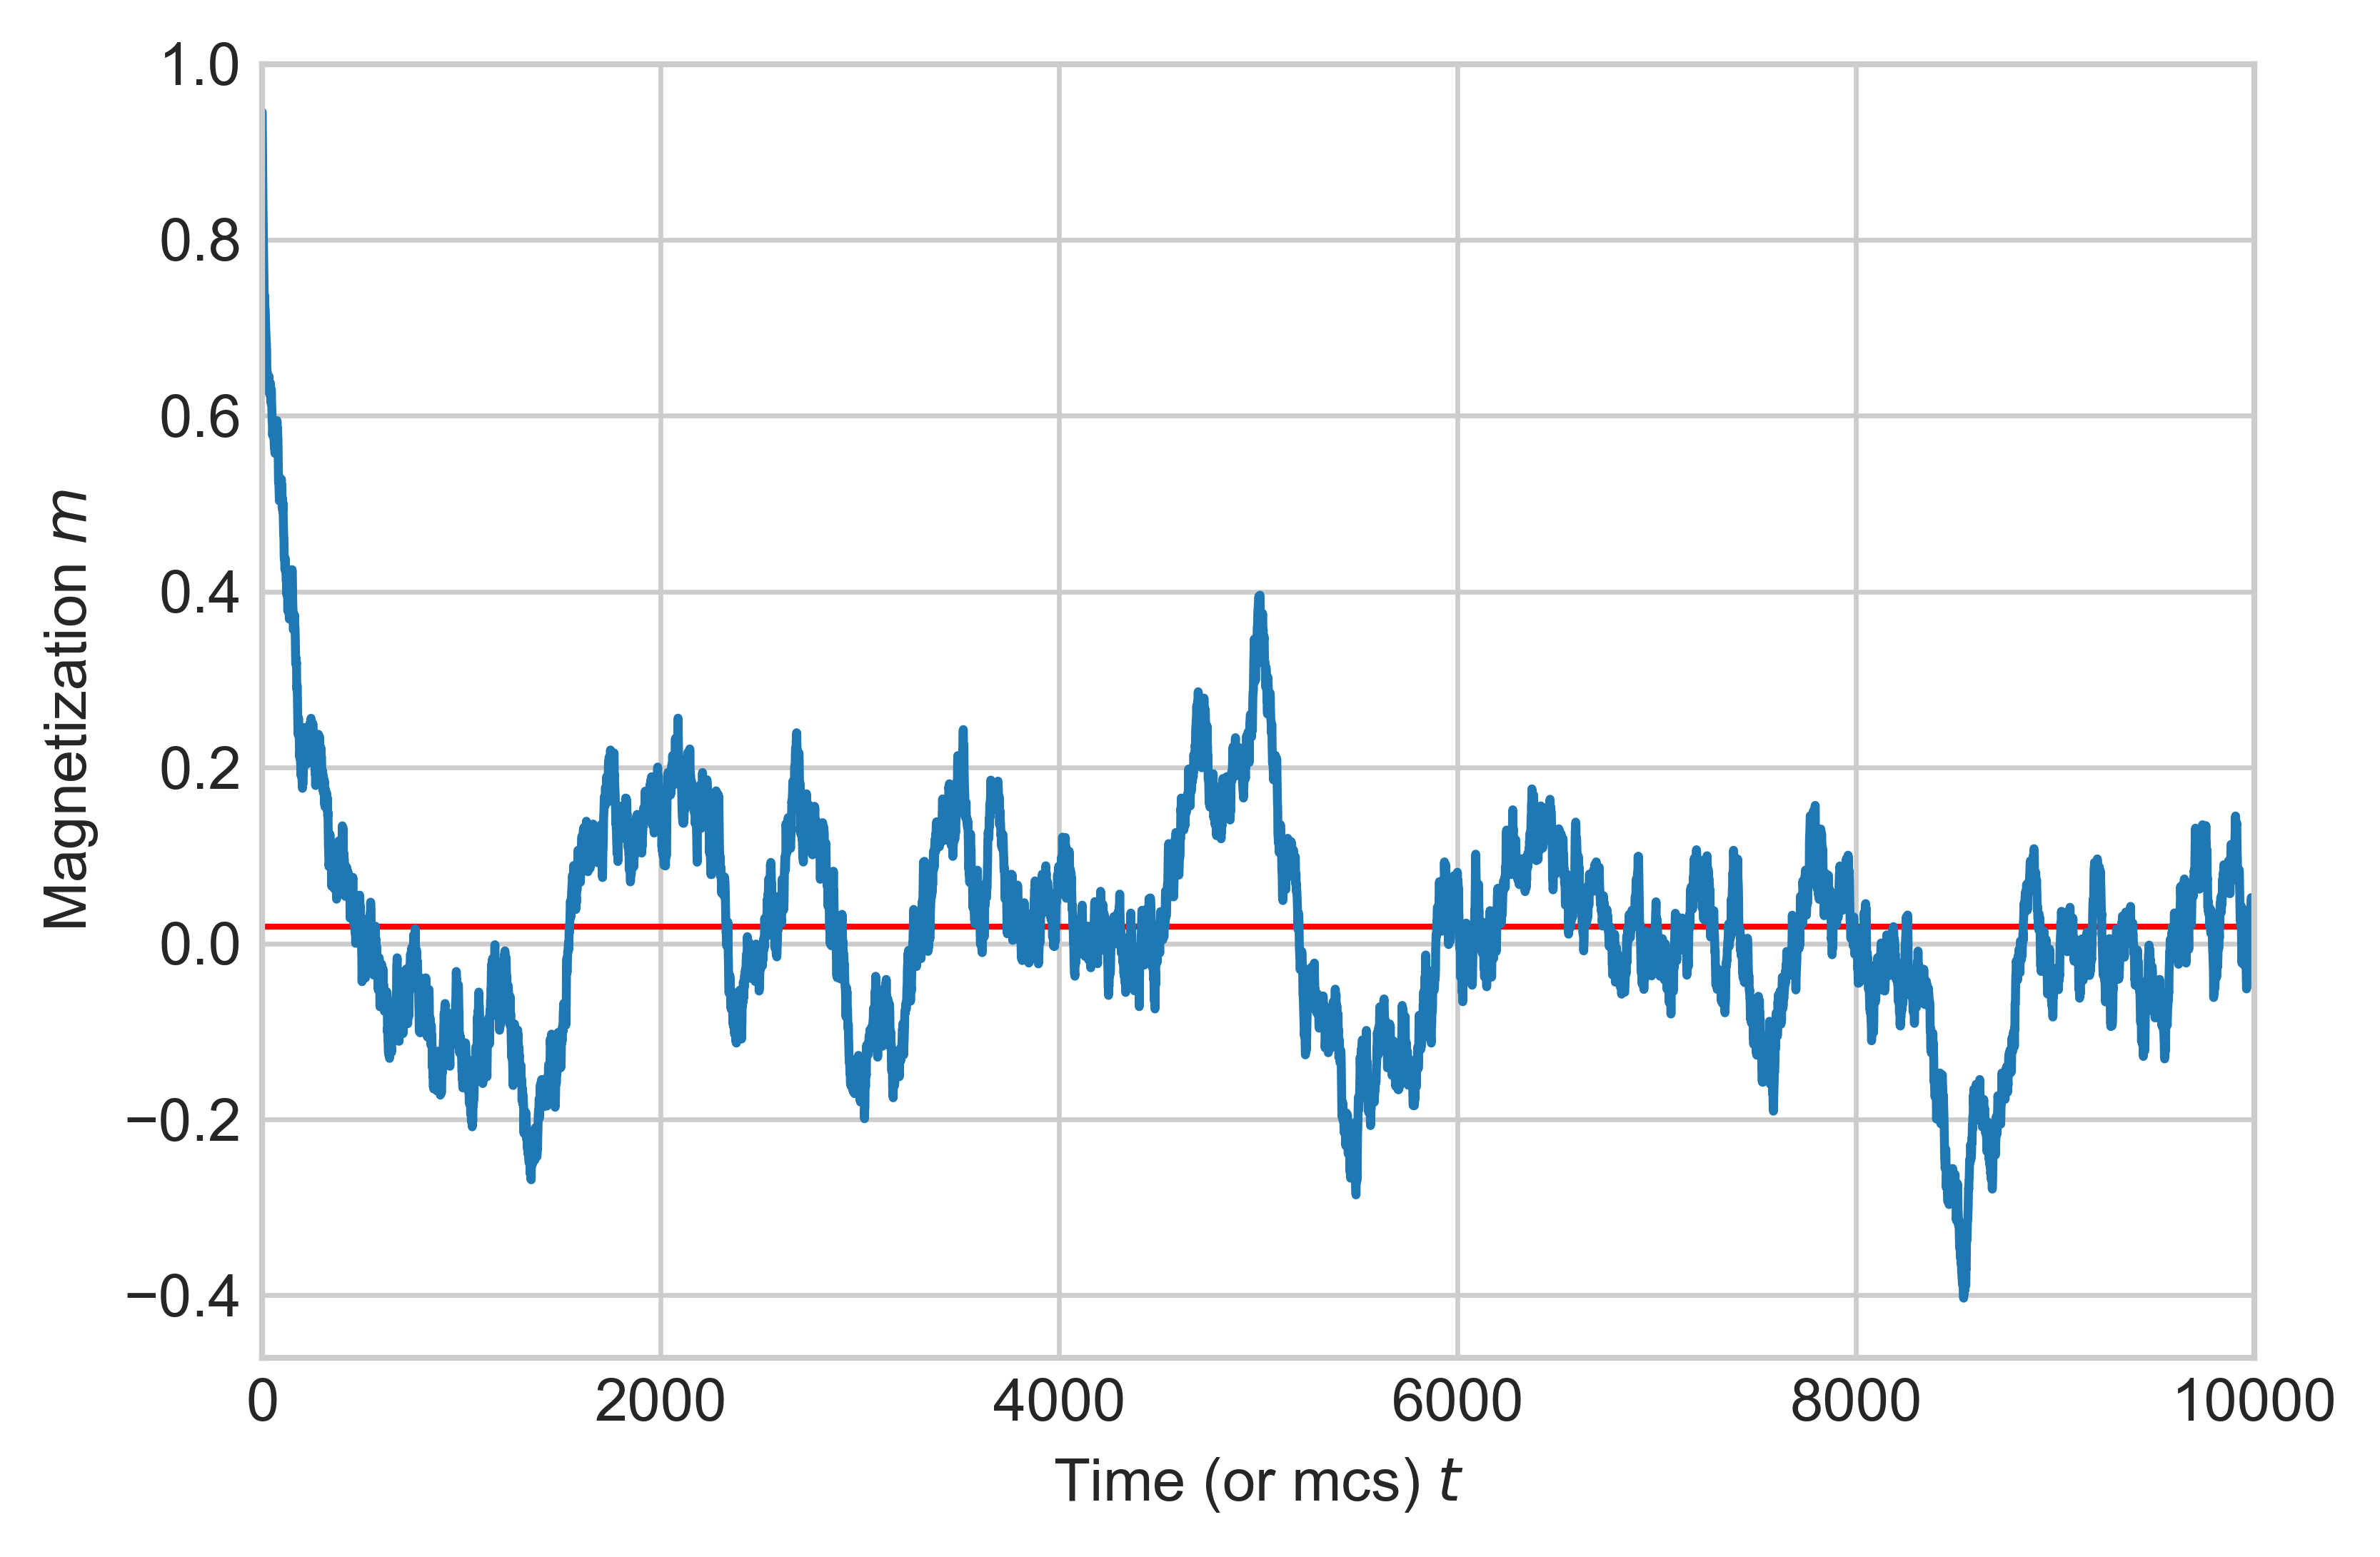

<m> is  0.01896904


<Figure size 3600x2400 with 0 Axes>

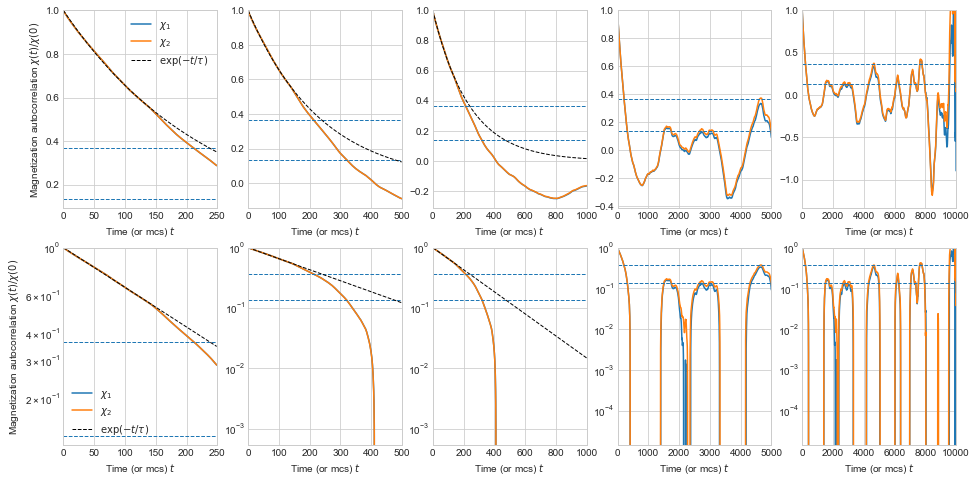

tau is 237.28420149574717


In [17]:
fig1_args = [mag_fig1,chi1(mag_fig1),chi2(mag_fig1)]
tau_drawer(fig1_args[0],fig1_args[1],fig1_args[2])

In [18]:
## Drawing time vs. magnetizaiton
# isTinf = False, Pick Random site = False
if 'mag_fig2' not in vars():
    mag_fig2 = __auto__(2.4,False,False)

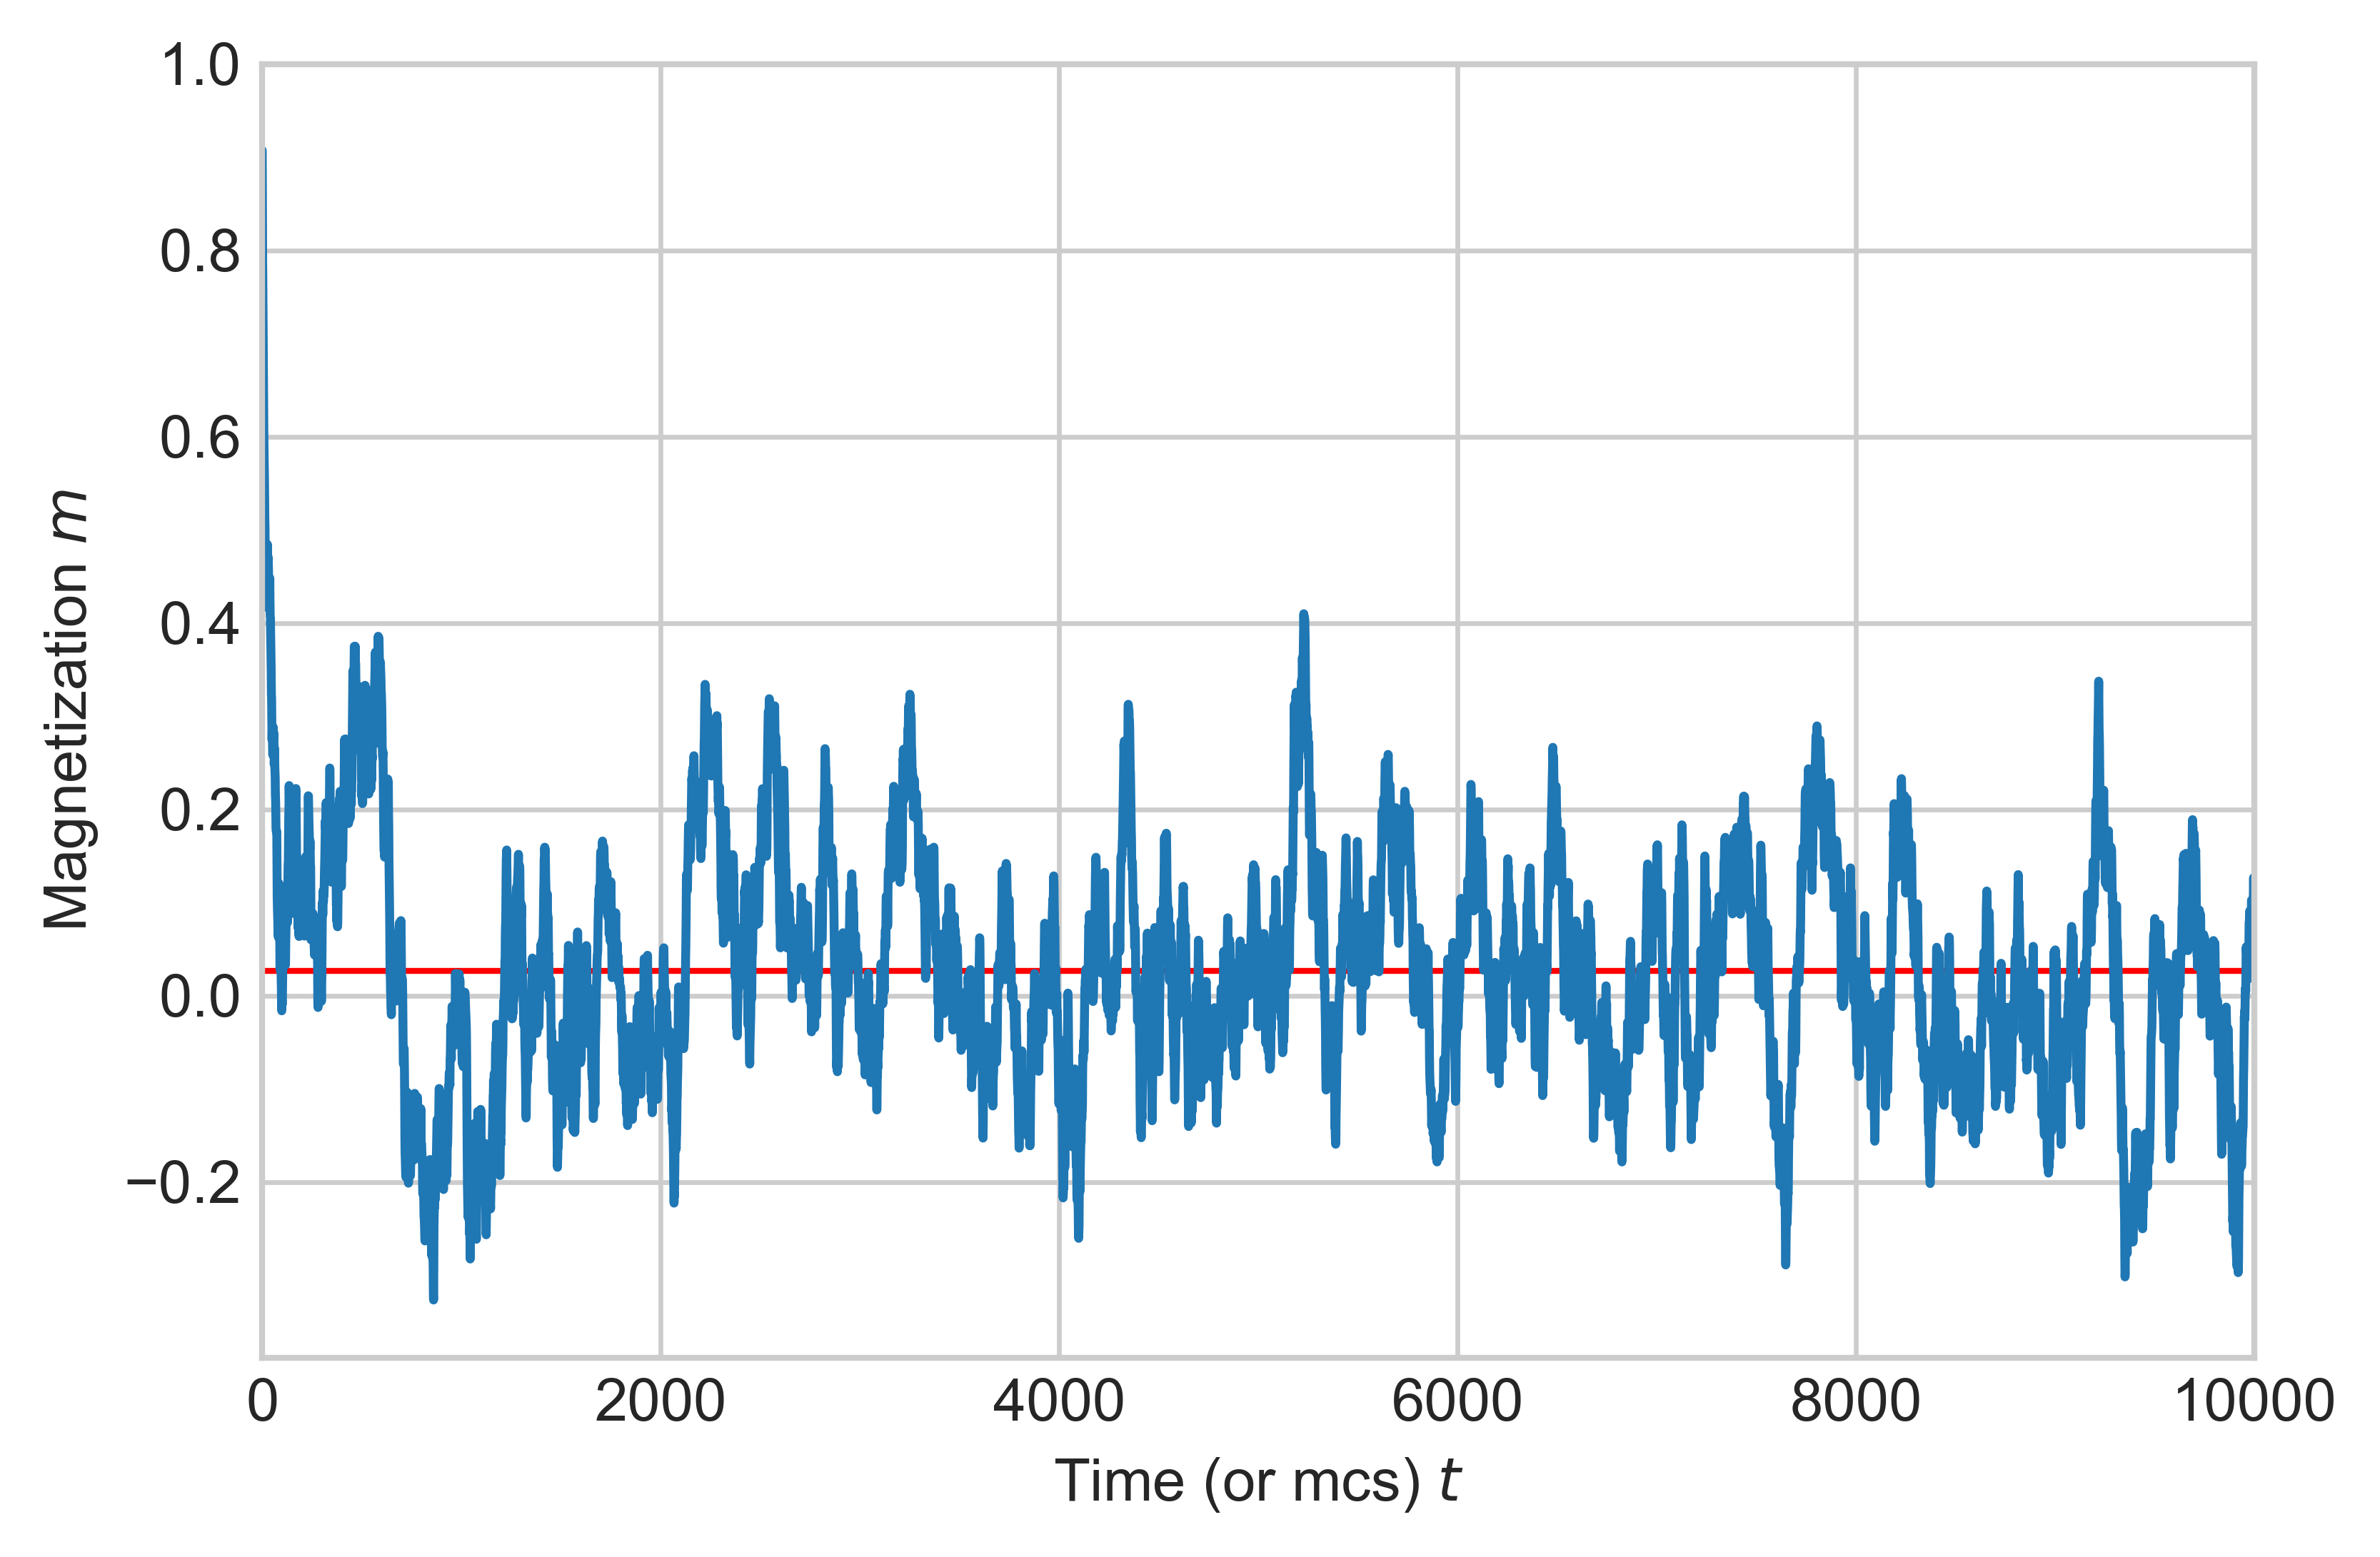

<m> is  0.026780400000000003


<Figure size 3600x2400 with 0 Axes>

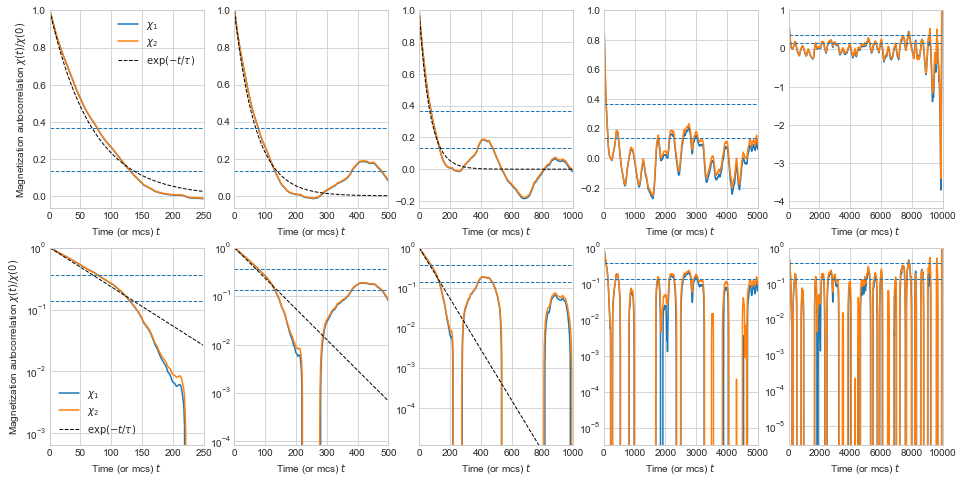

tau is 68.61009808206333


In [72]:
save_auto_data(mag_fig2,"Result\mag_fig2.txt")
fig2_args = [mag_fig2,chi1(mag_fig2),chi2(mag_fig2)]
tau_drawer(fig2_args[0],fig2_args[1],fig2_args[2])

In [20]:
## Drawing time vs. magnetizaiton
# isTinf = True, Pick Random site = False
if 'mag_fig3' not in vars():
    mag_fig3 = __auto__(2.4,True,False)

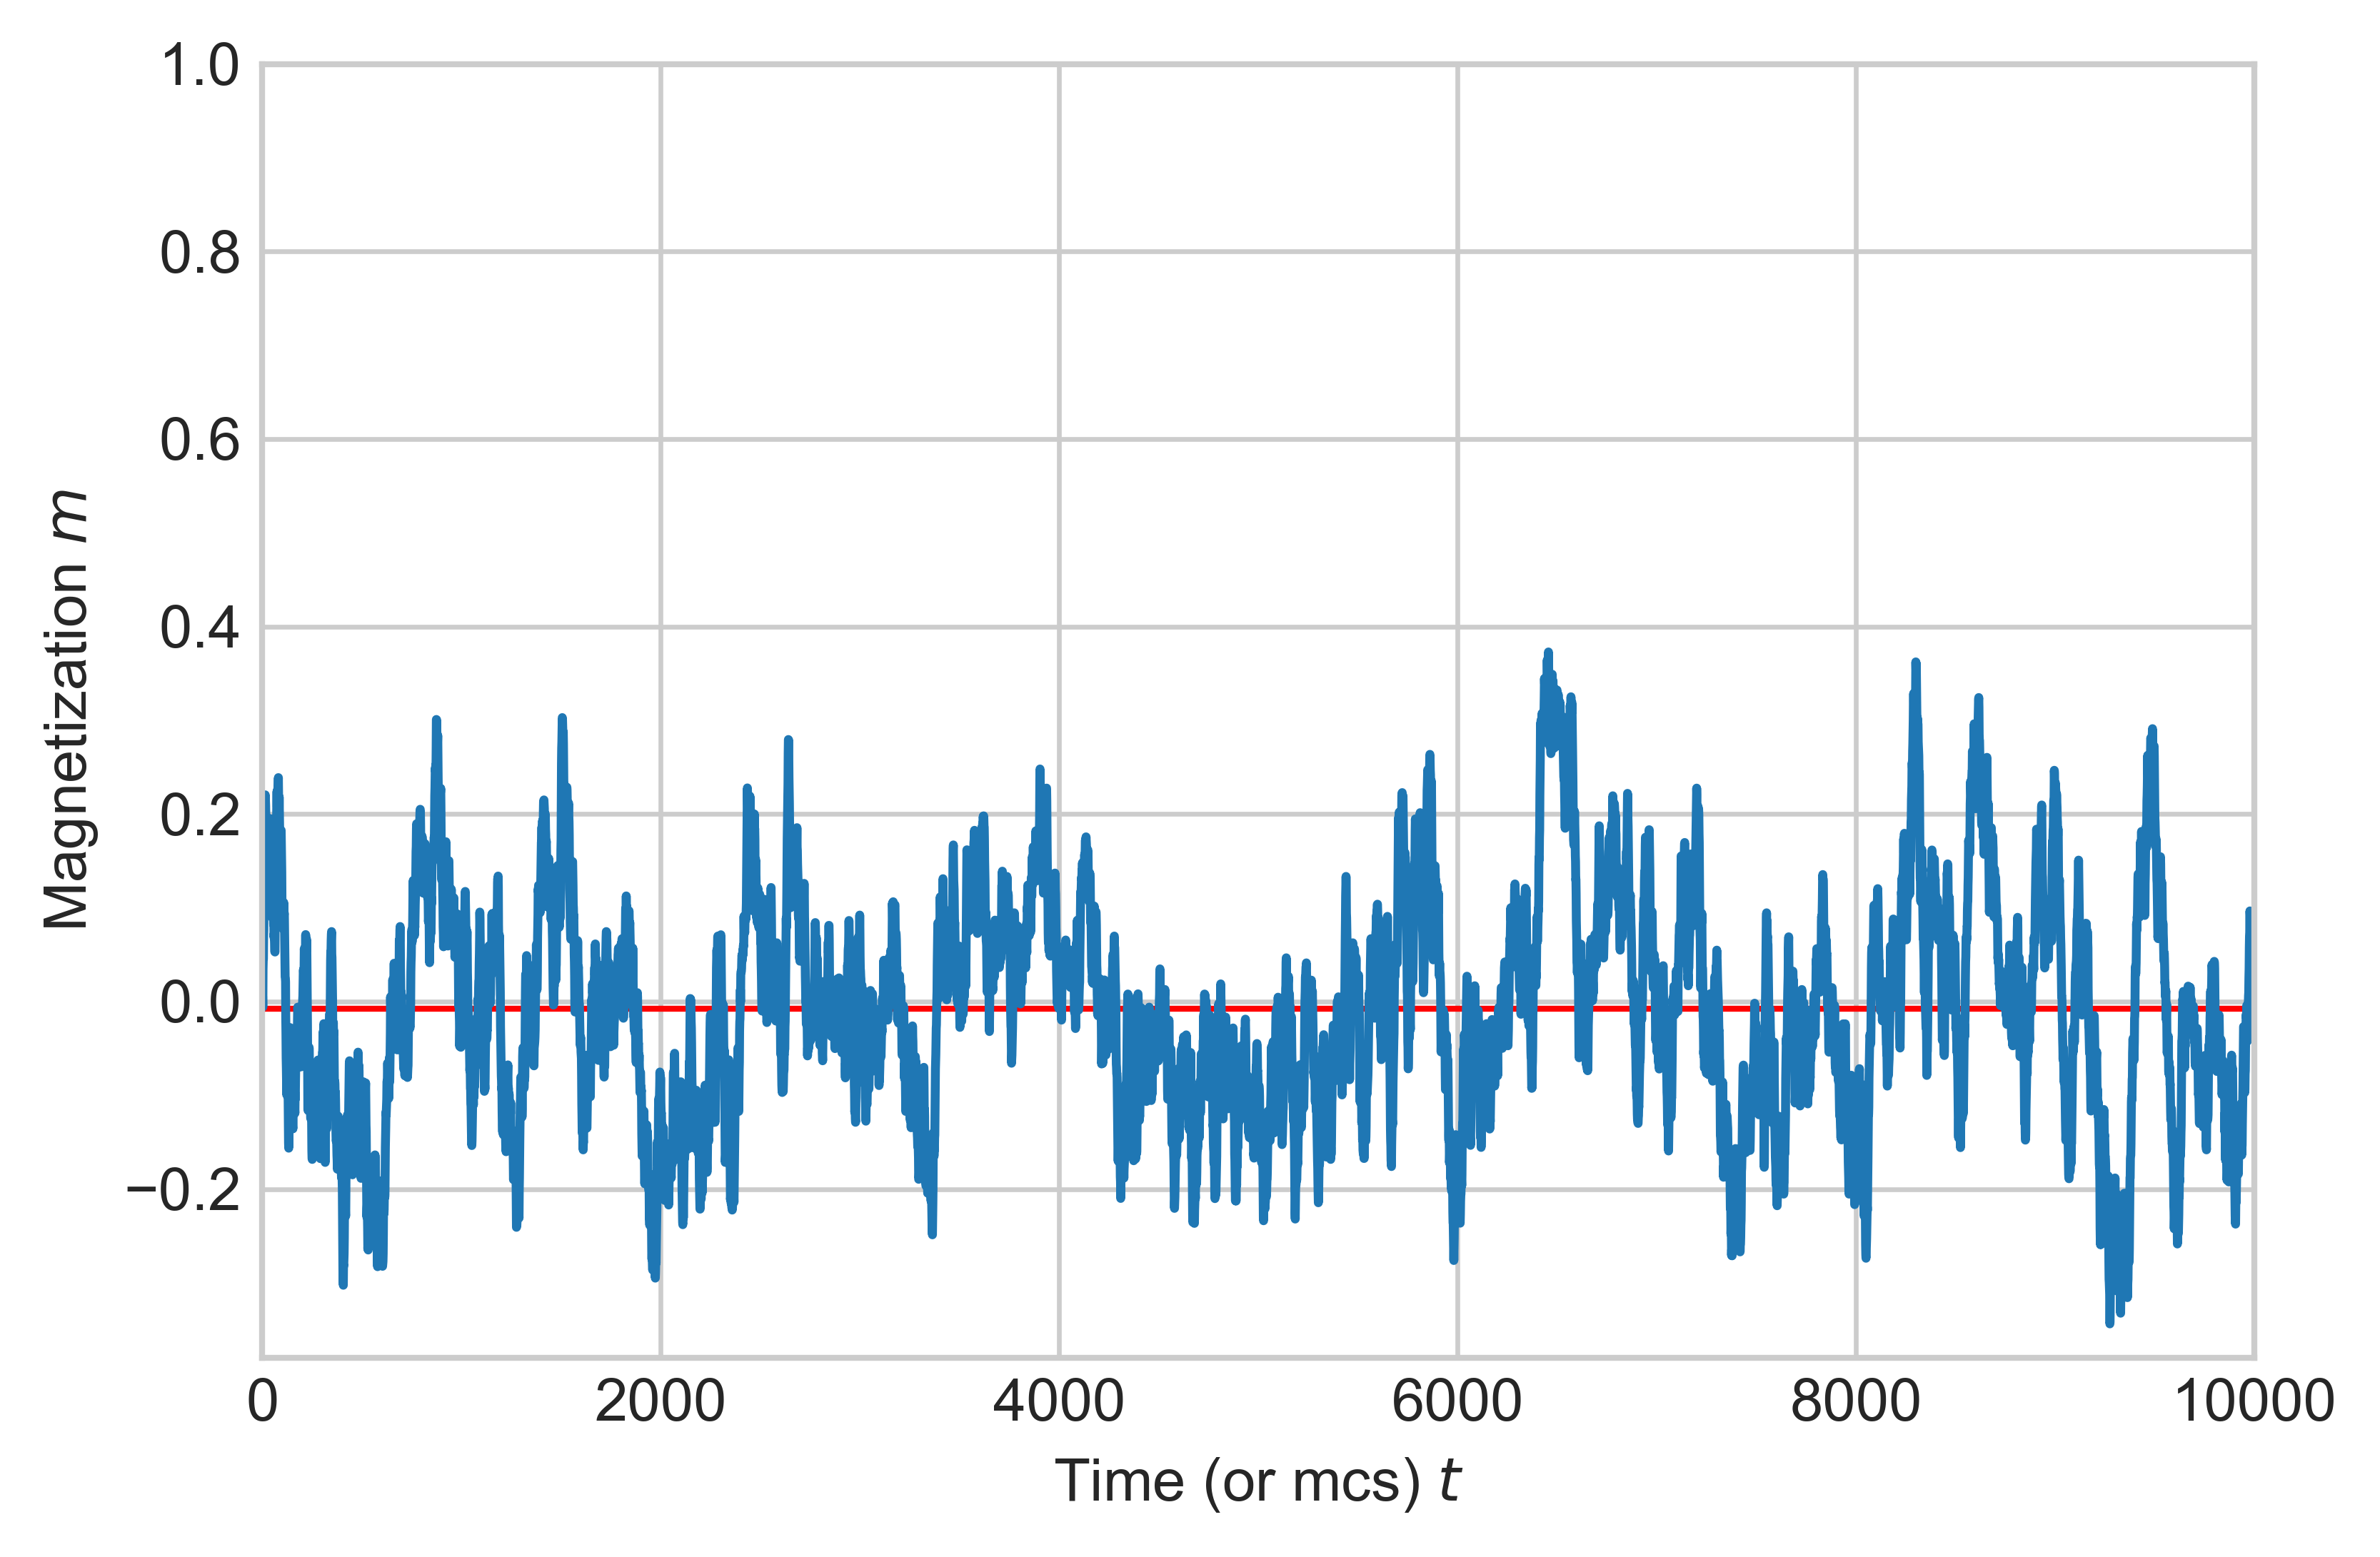

<m> is  -0.007907139999999997


<Figure size 3600x2400 with 0 Axes>

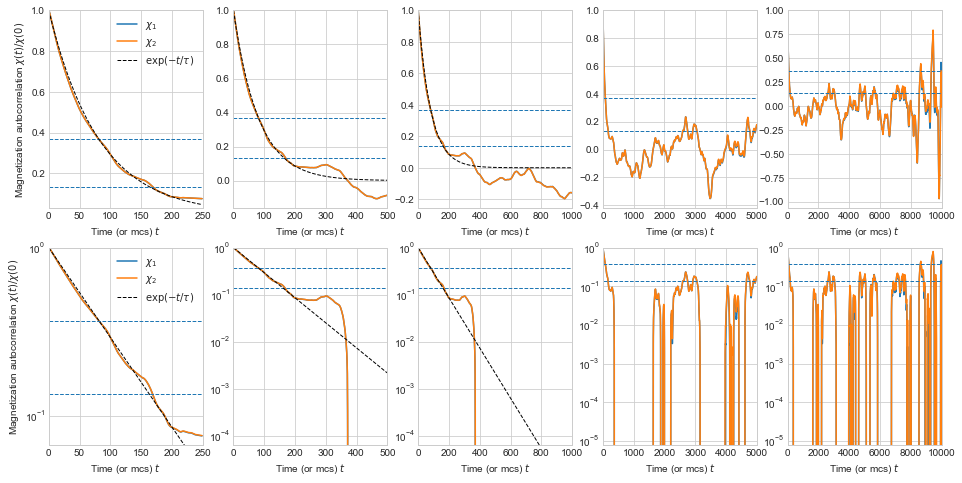

tau is 81.46395078769183


In [73]:
save_auto_data(mag_fig3,"Result\mag_fig3.txt")
fig3_args = [mag_fig3,chi1(mag_fig3),chi2(mag_fig3)]
tau_drawer(fig3_args[0],fig3_args[1],fig3_args[2],_bin2 = 100)

In [22]:
# isTinf = True, Pick Random site = True
if 'mag_fig4' not in vars():
    mag_fig4 = __auto__(2.4,True,True)

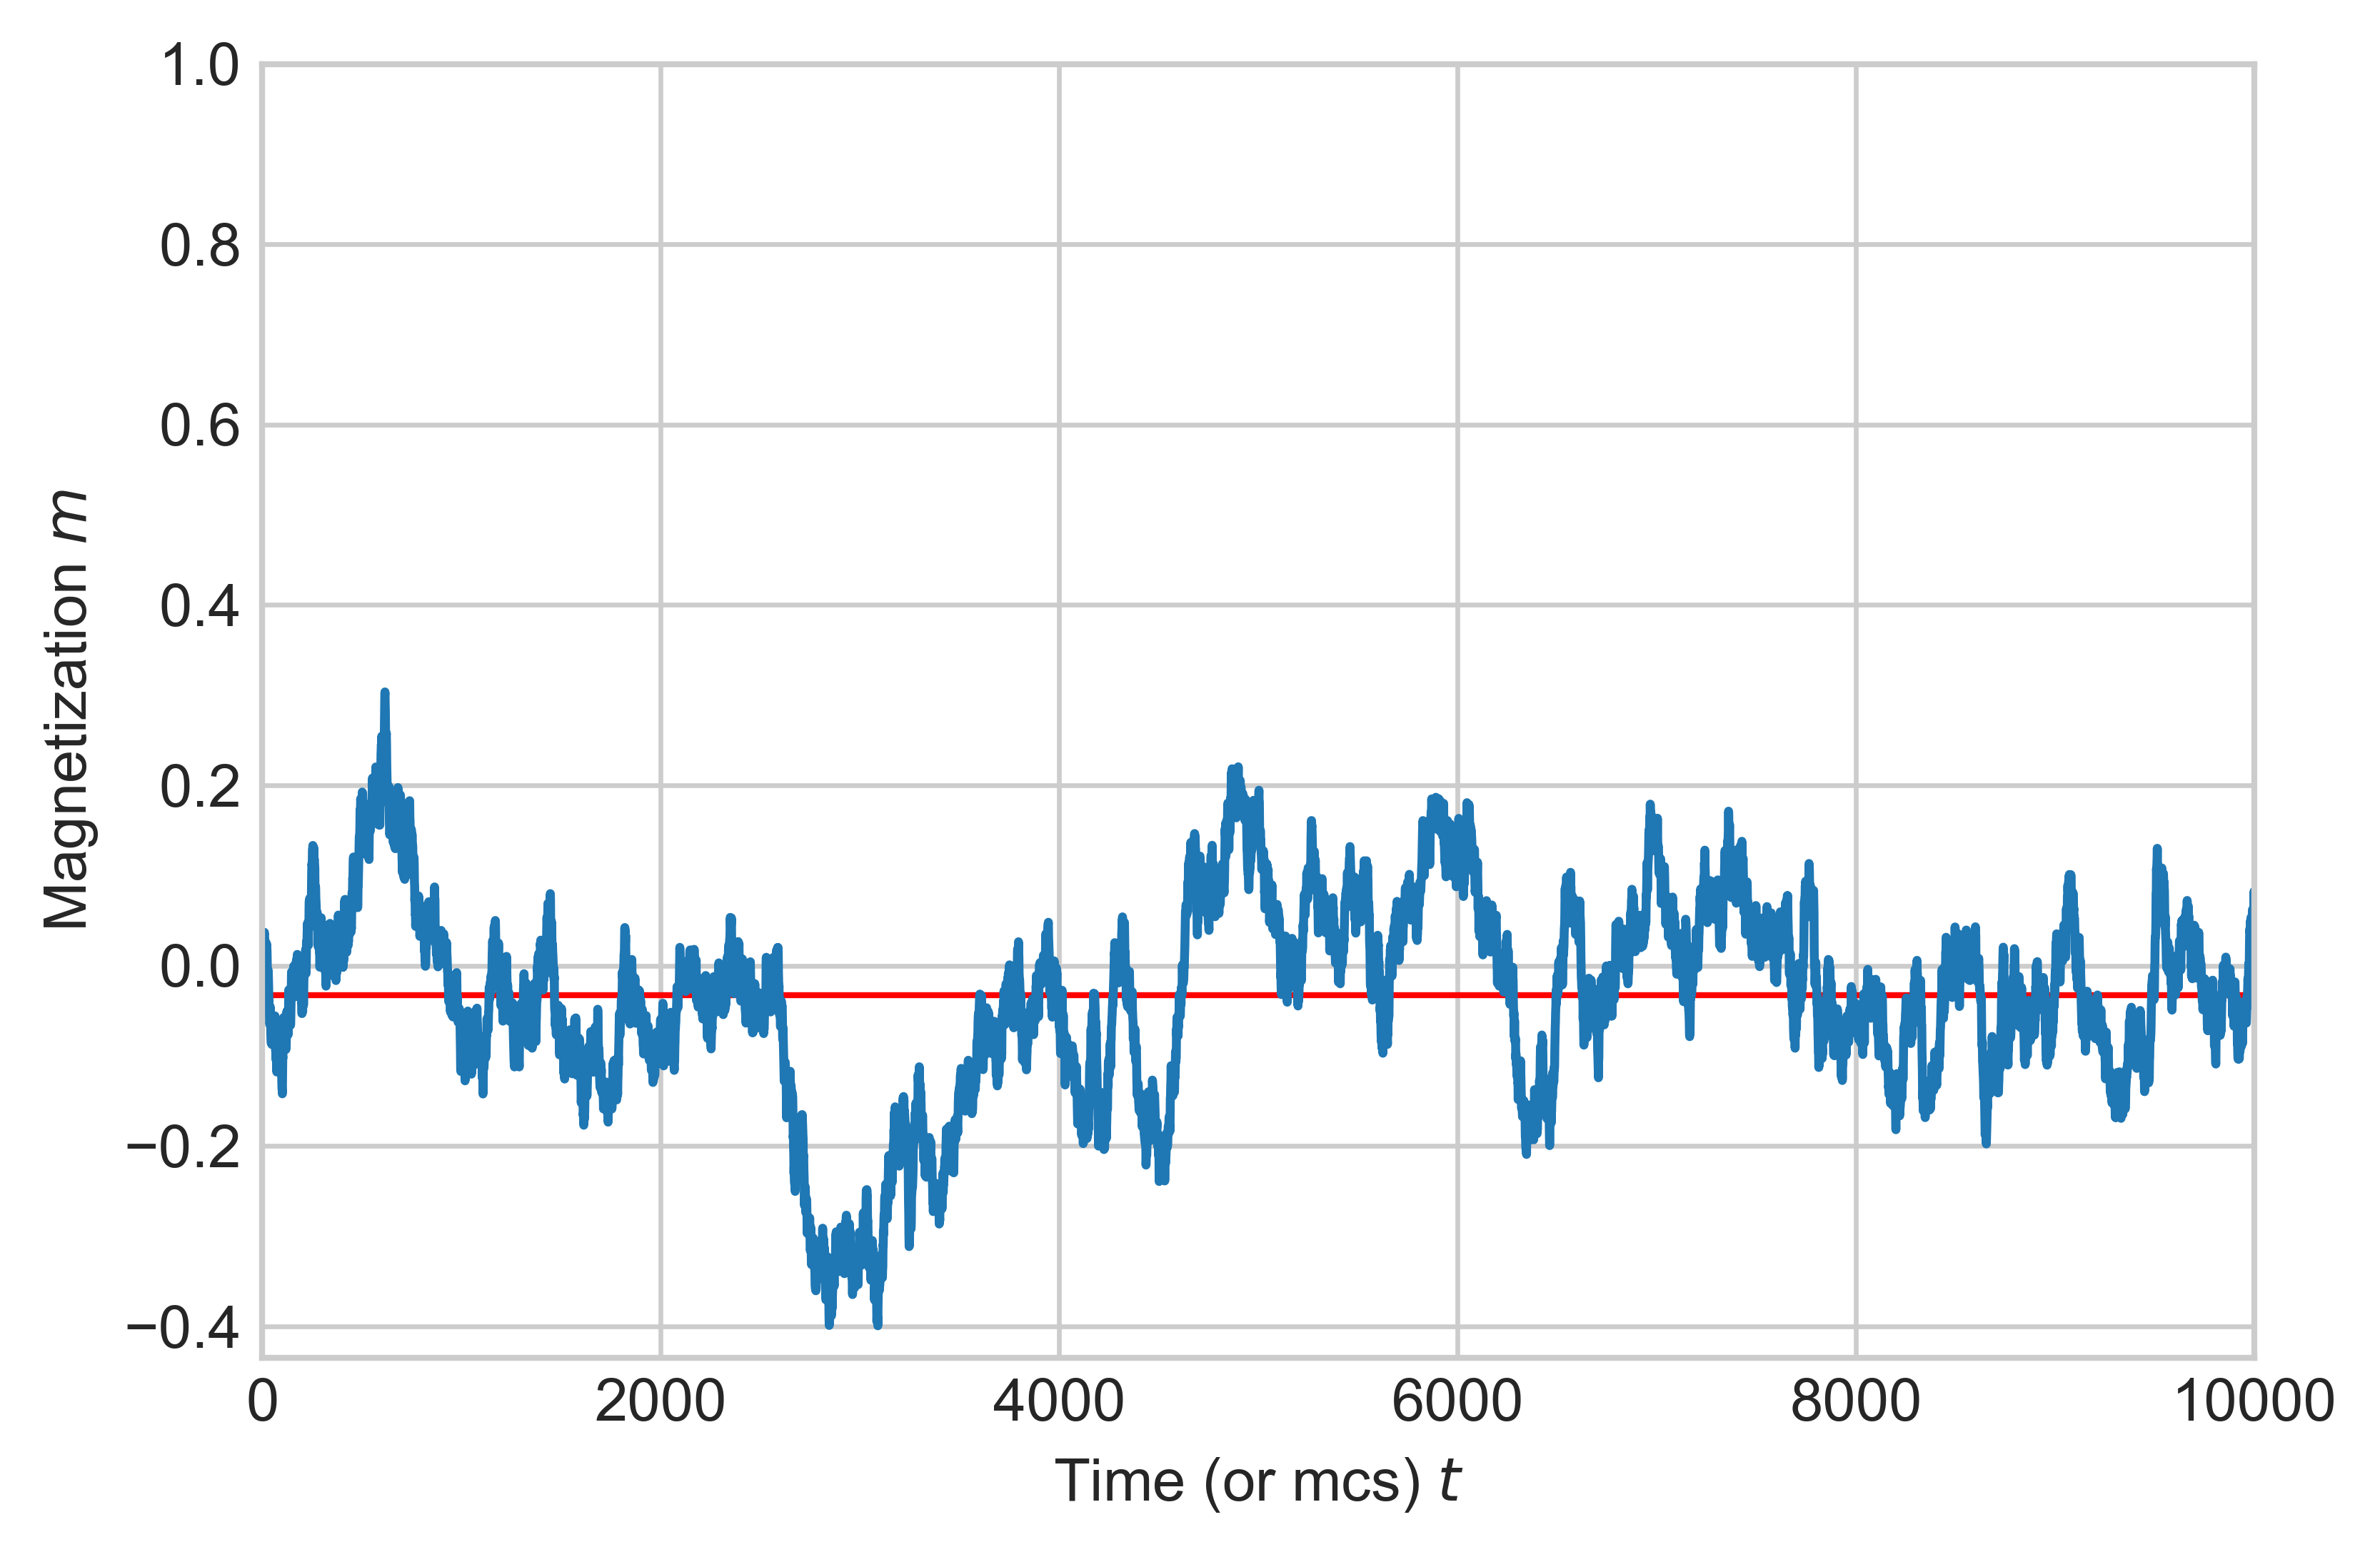

<m> is  -0.032829159999999996


<Figure size 3600x2400 with 0 Axes>

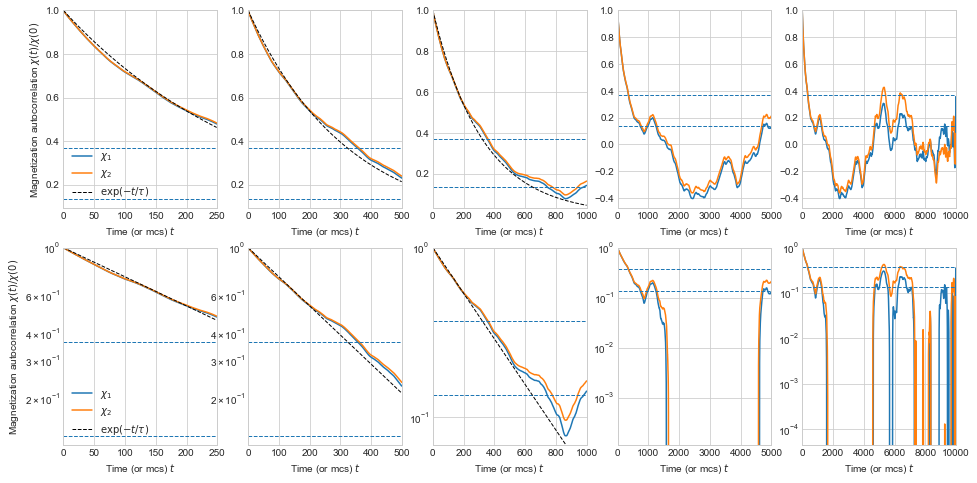

tau is 322.91035443813945


In [74]:
save_auto_data(mag_fig4,"Result\mag_fig4.txt")
fig4_args = [mag_fig4,chi1(mag_fig4),chi2(mag_fig4)]
tau_drawer(fig4_args[0],fig4_args[1],fig4_args[2])

In [24]:
if 'mag_fig5' not in vars():
    mag_fig5 = __auto__(2.4,False,False,False)

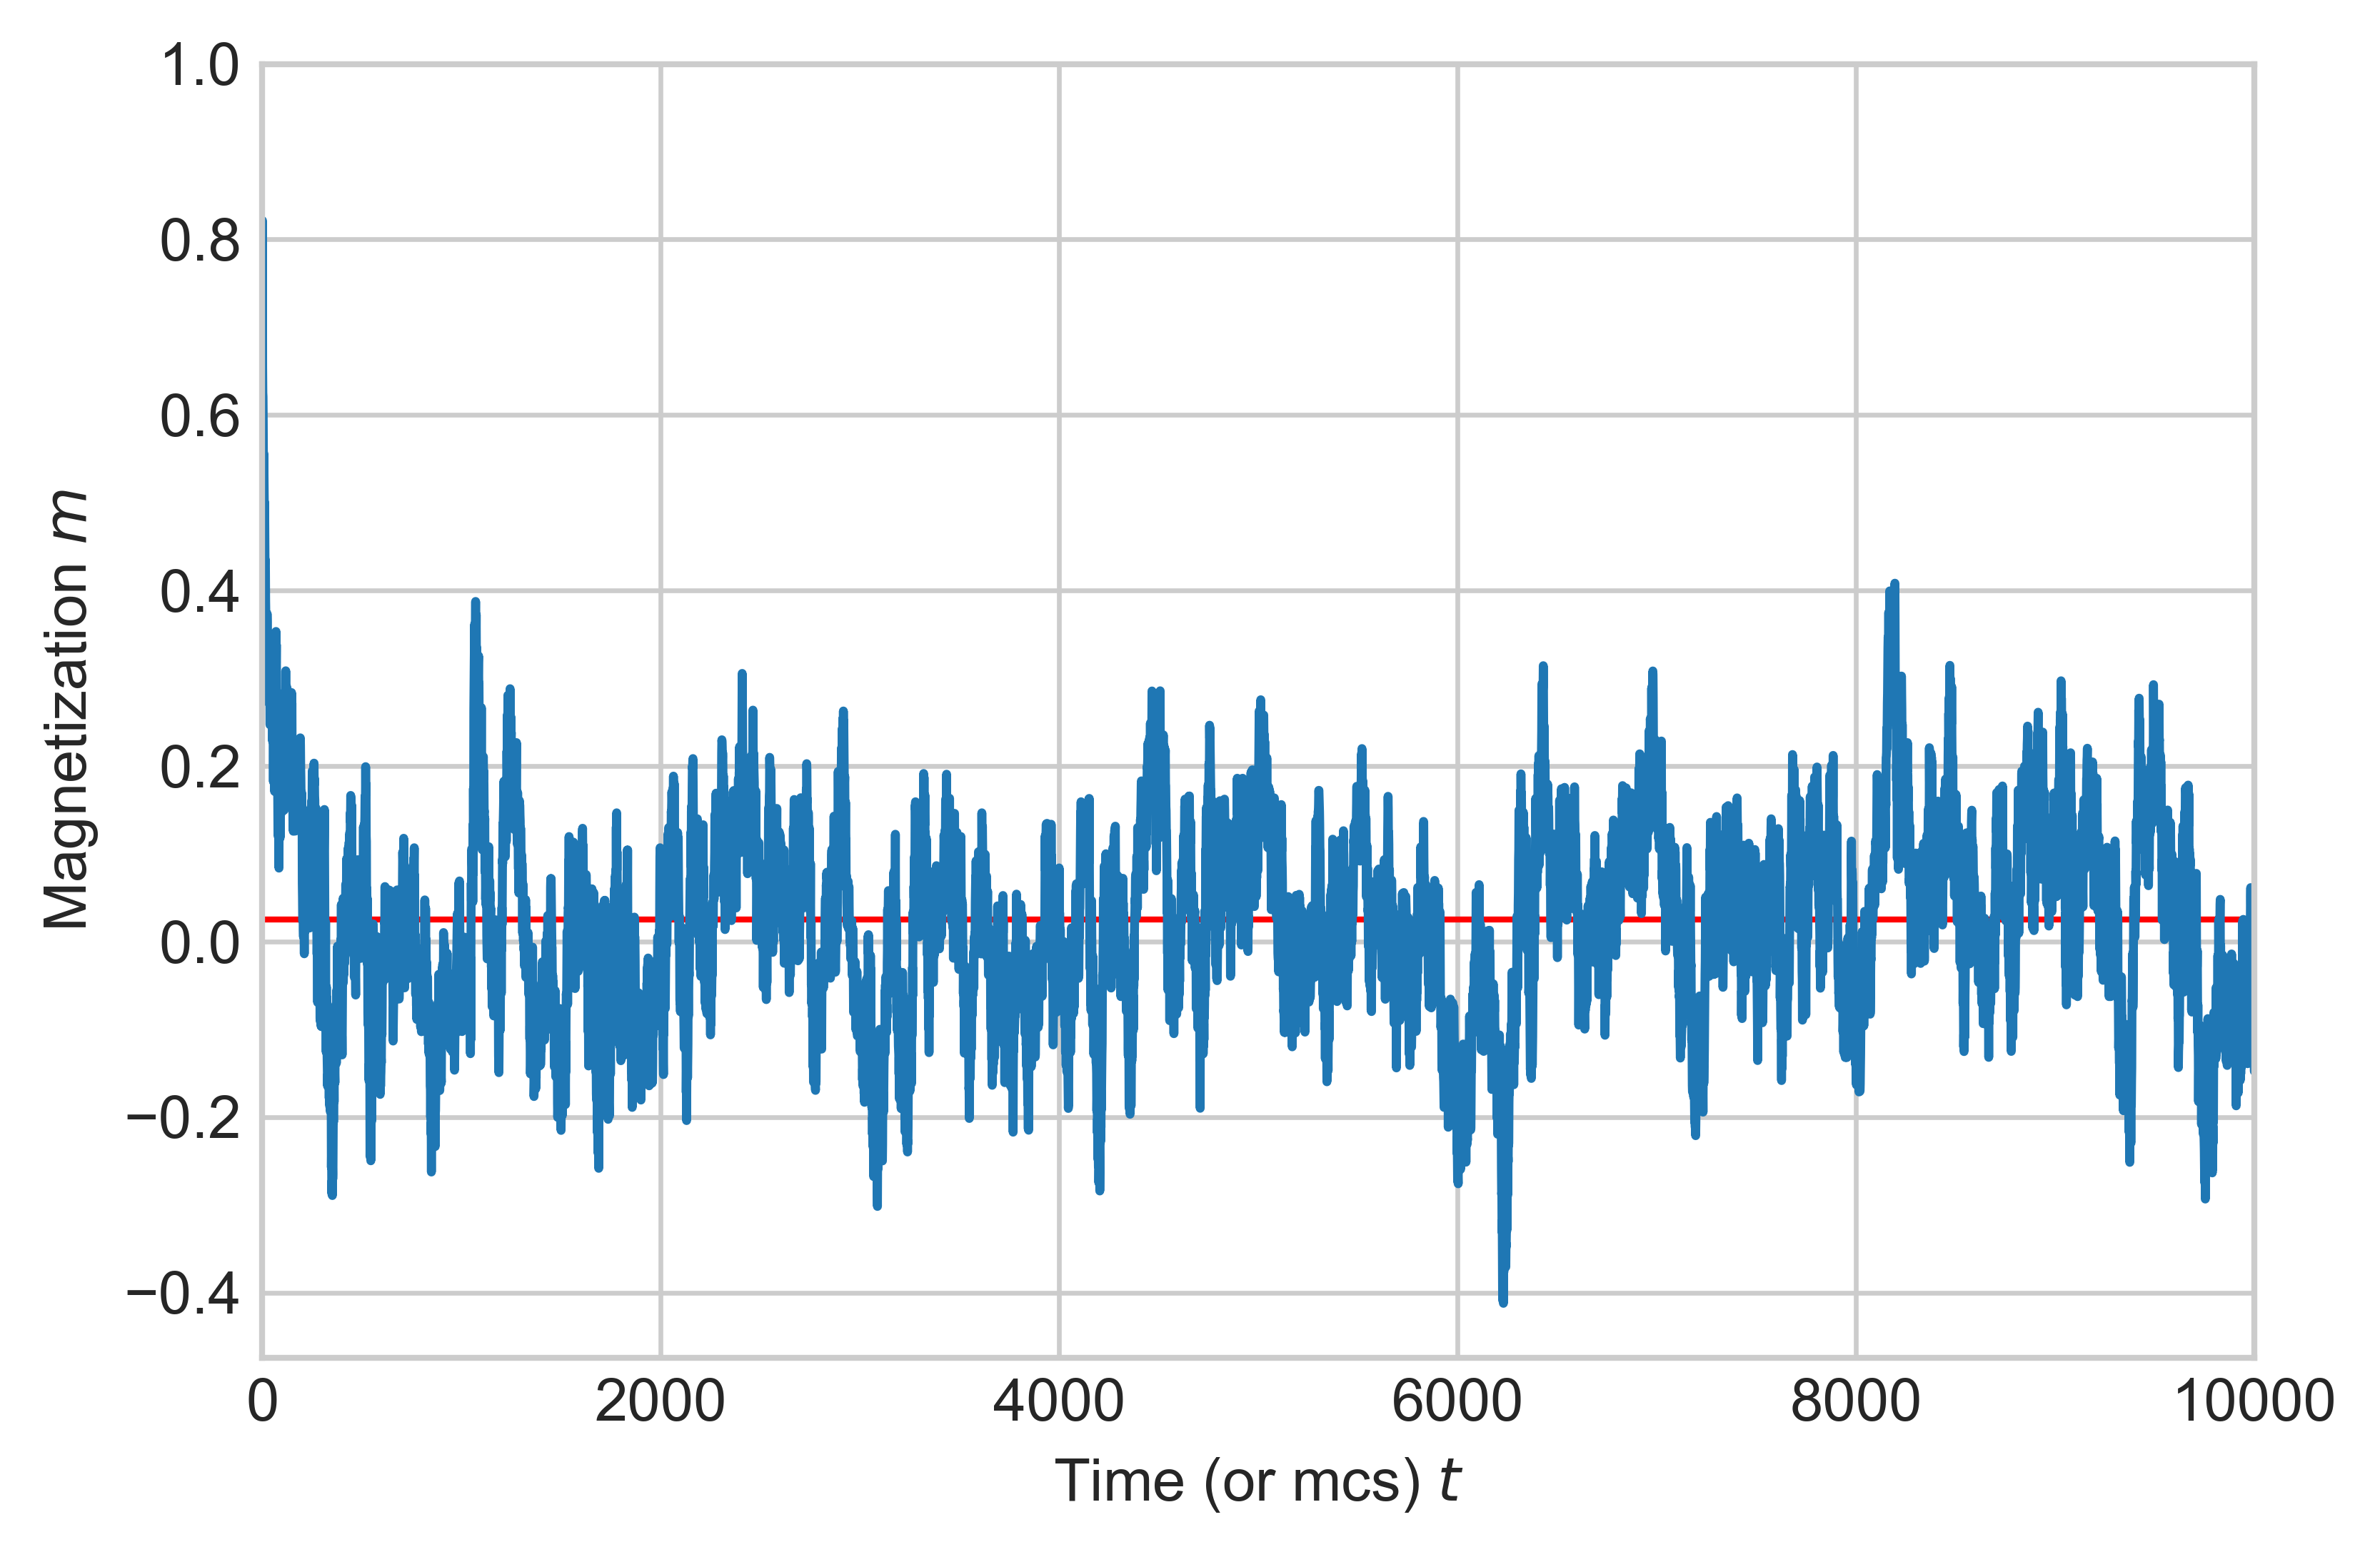

<m> is  0.024948520000000002


<Figure size 3600x2400 with 0 Axes>

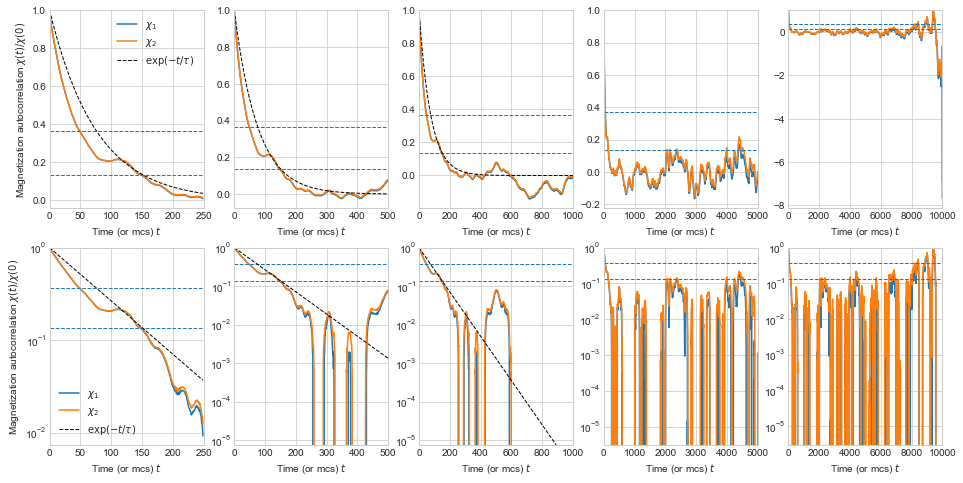

tau is 75.61739833400543


In [25]:
save_auto_data(mag_fig5,"Result\mag_fig5.txt")
fig5_args = [mag_fig5,chi1(mag_fig5),chi2(mag_fig5)]
tau_drawer(fig5_args[0],fig5_args[1],fig5_args[2])

In [26]:
mag_fig6 = __auto__(2.4,False,False)

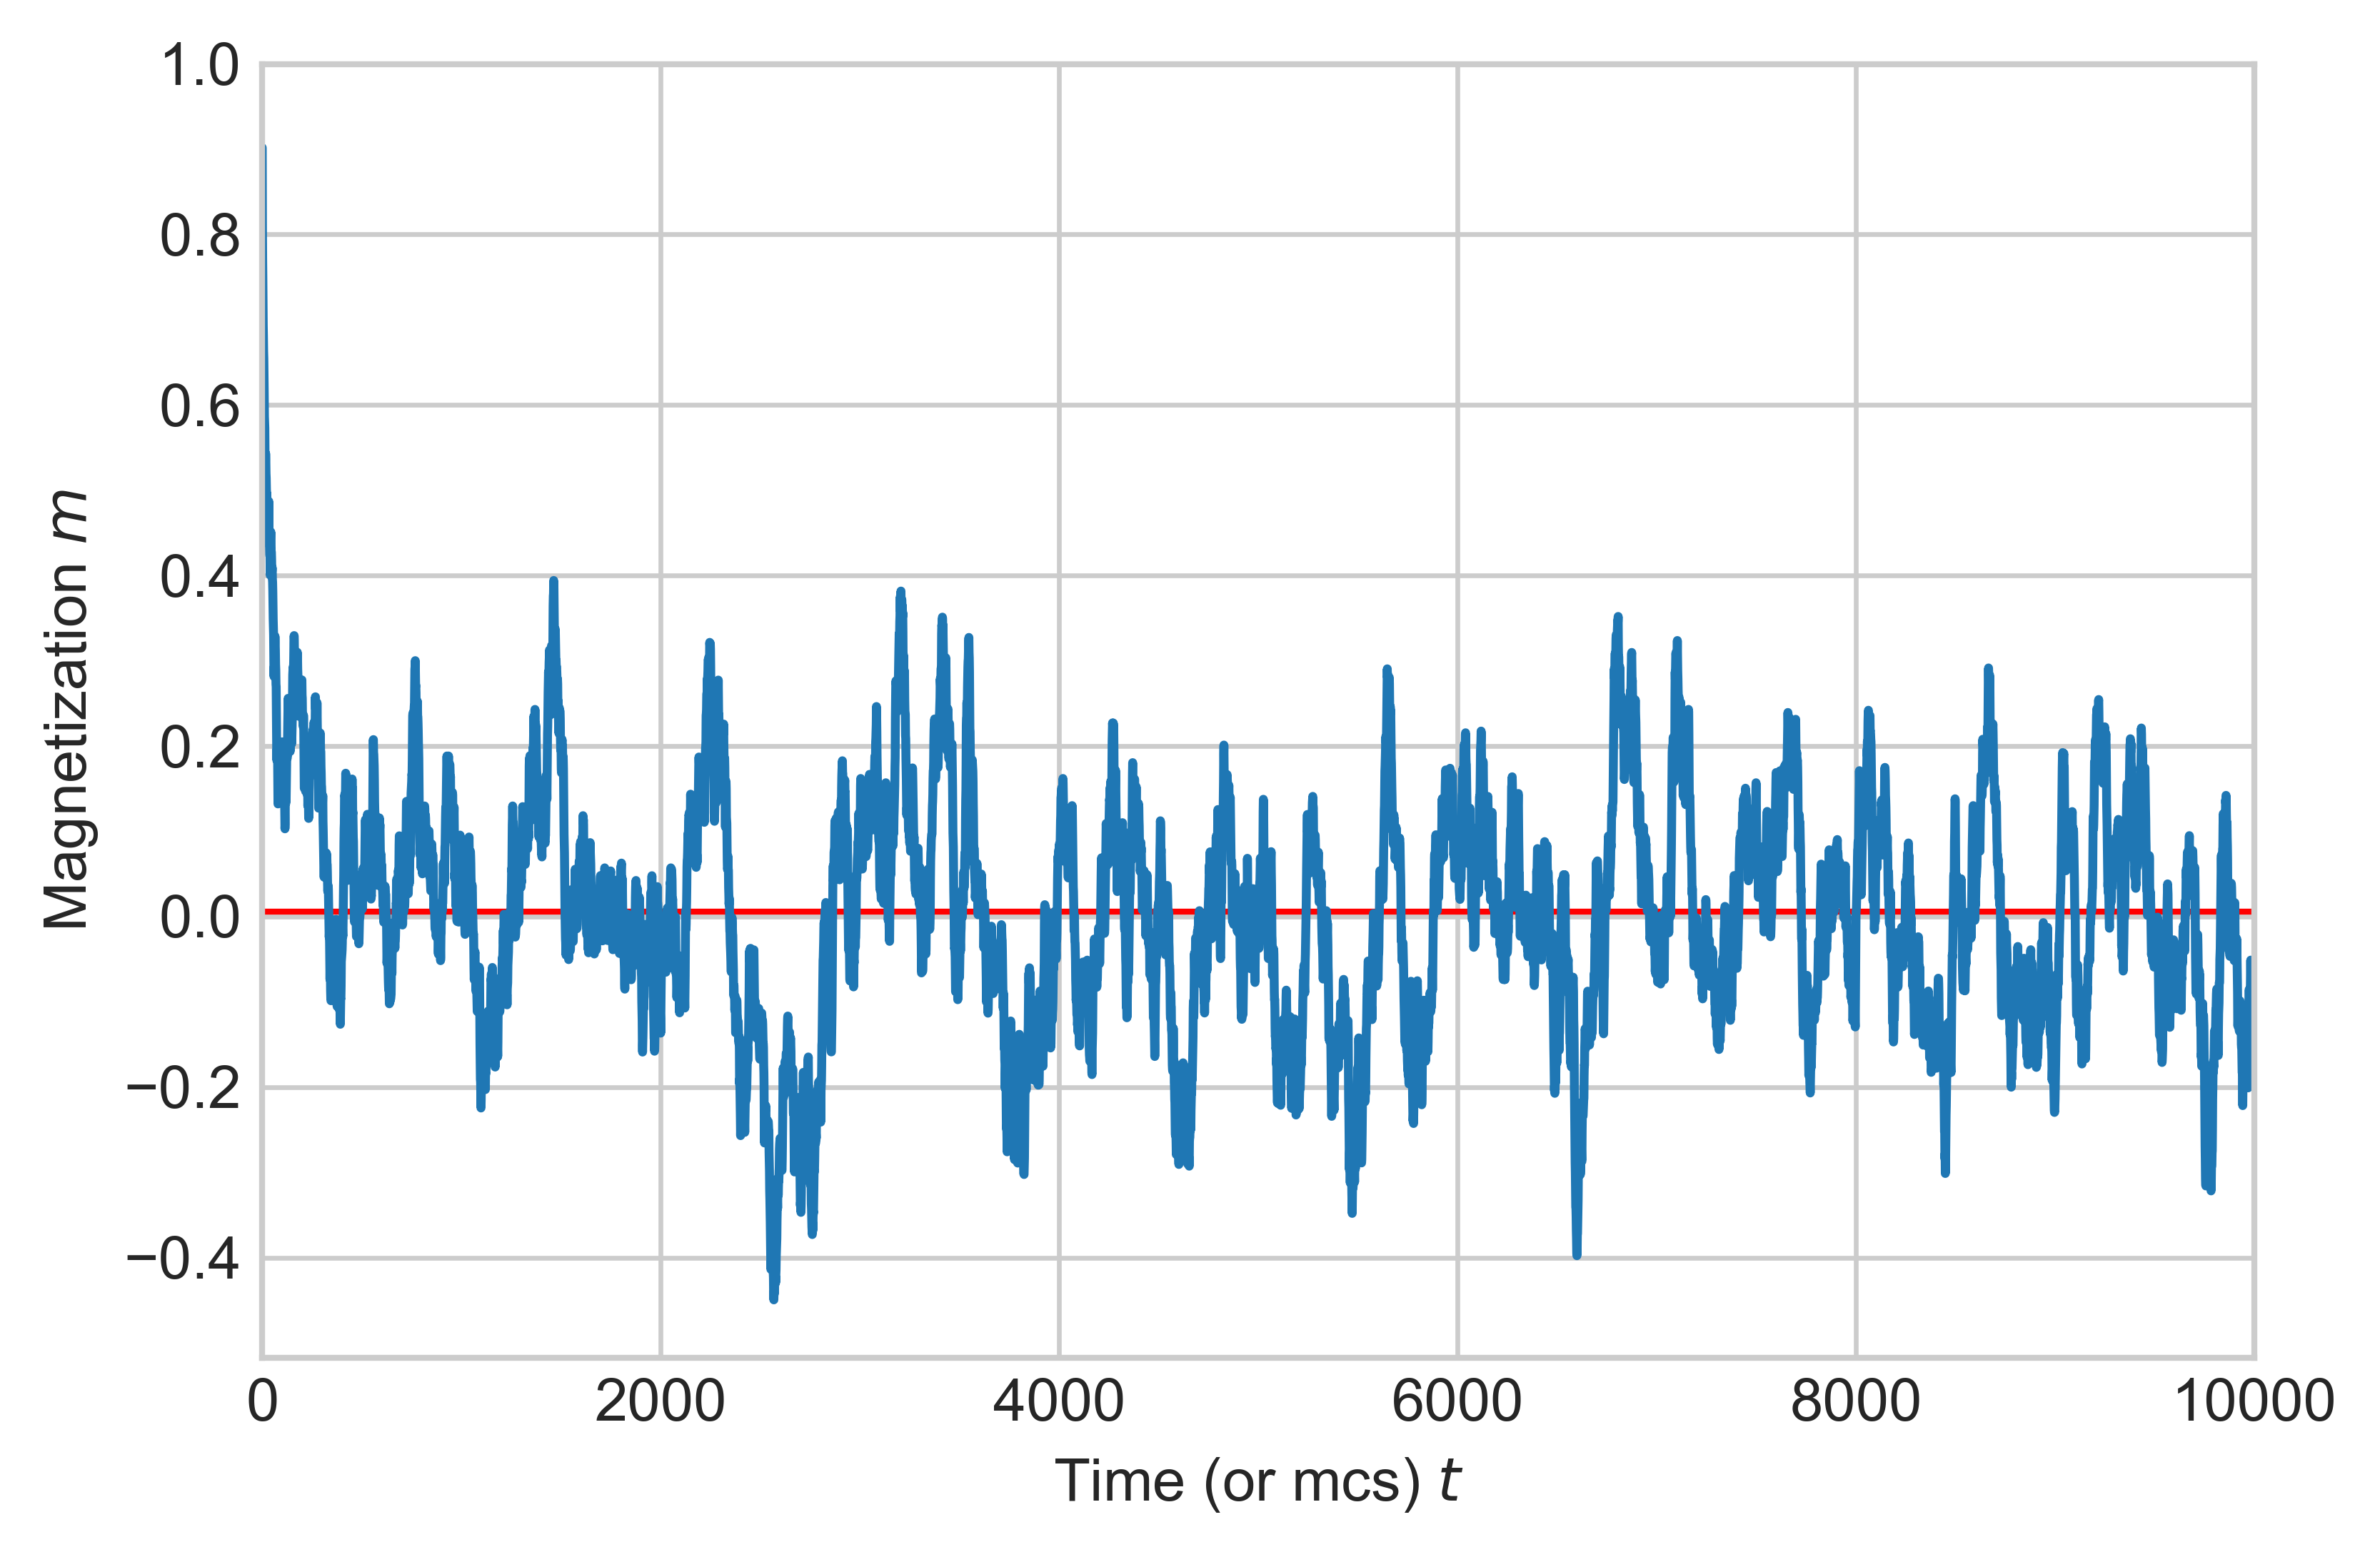

<m> is  0.005528539999999997


<Figure size 3600x2400 with 0 Axes>

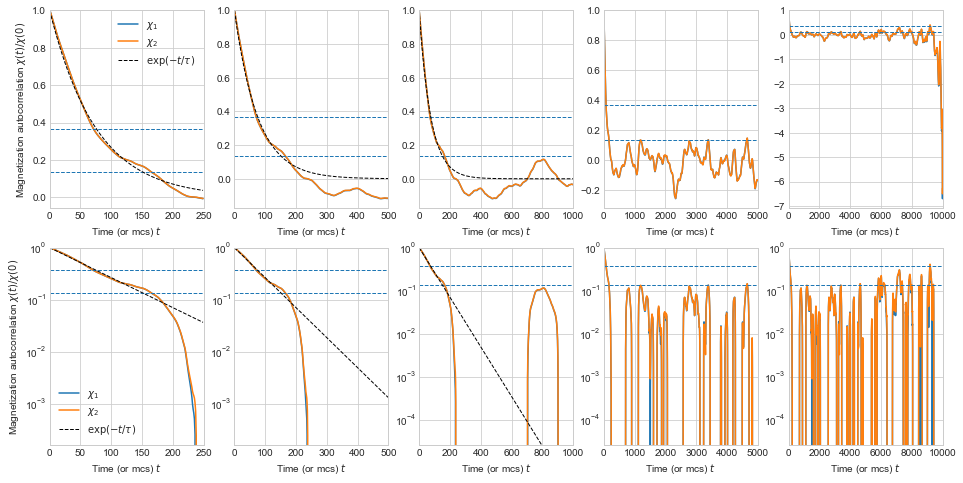

tau is 75.45001071116491


In [27]:
fig6_args = [mag_fig6,chi1(mag_fig6),chi2(mag_fig6)]
tau_drawer(fig6_args[0],fig6_args[1],fig6_args[2])

In [28]:
def tau_drawer_loading(path):
    # file_stream = open("..\C++\Result\Metropolis_c_Error_100_int25_auto_"+str(1)+".csv",'r')
    file_stream = open(path,'r')
    # file_stream = open("..\C++\Result\Autocorrelation\Abs\Metropolis_c_Error_100_int25_auto_"+str(5)+".csv",'r')

    lines = file_stream.readlines()
    file_stream.close()
    __sample = np.array([np.array(line.strip().split(','),dtype=np.double) for line in lines],dtype=object)
    print(__sample)

    # __sample = __sample[:][0:1000]
    print(__sample.shape)
    __tTemp = 2.4
    i = 11
    print(__sample[i][0])
    auto_chi1 = chi1(__sample[i][1:])
    auto_chi2 = chi2(__sample[i][1:])
    tau_drawer(__sample[i][1:],auto_chi1,auto_chi2)

[[0.2 1.0 1.0 ... 1.0 1.0 1.0]
 [0.4 1.0 1.0 ... 1.0 1.0 1.0]
 [0.6 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [4.6 0.442 -0.198 ... 0.0008 0.0202 0.0164]
 [4.8 0.3708 -0.2664 ... 0.0086 -0.0106 0.0028]
 [5.0 0.354 -0.2938 ... 0.0188 0.0112 0.0172]]
(25, 10001)
2.4


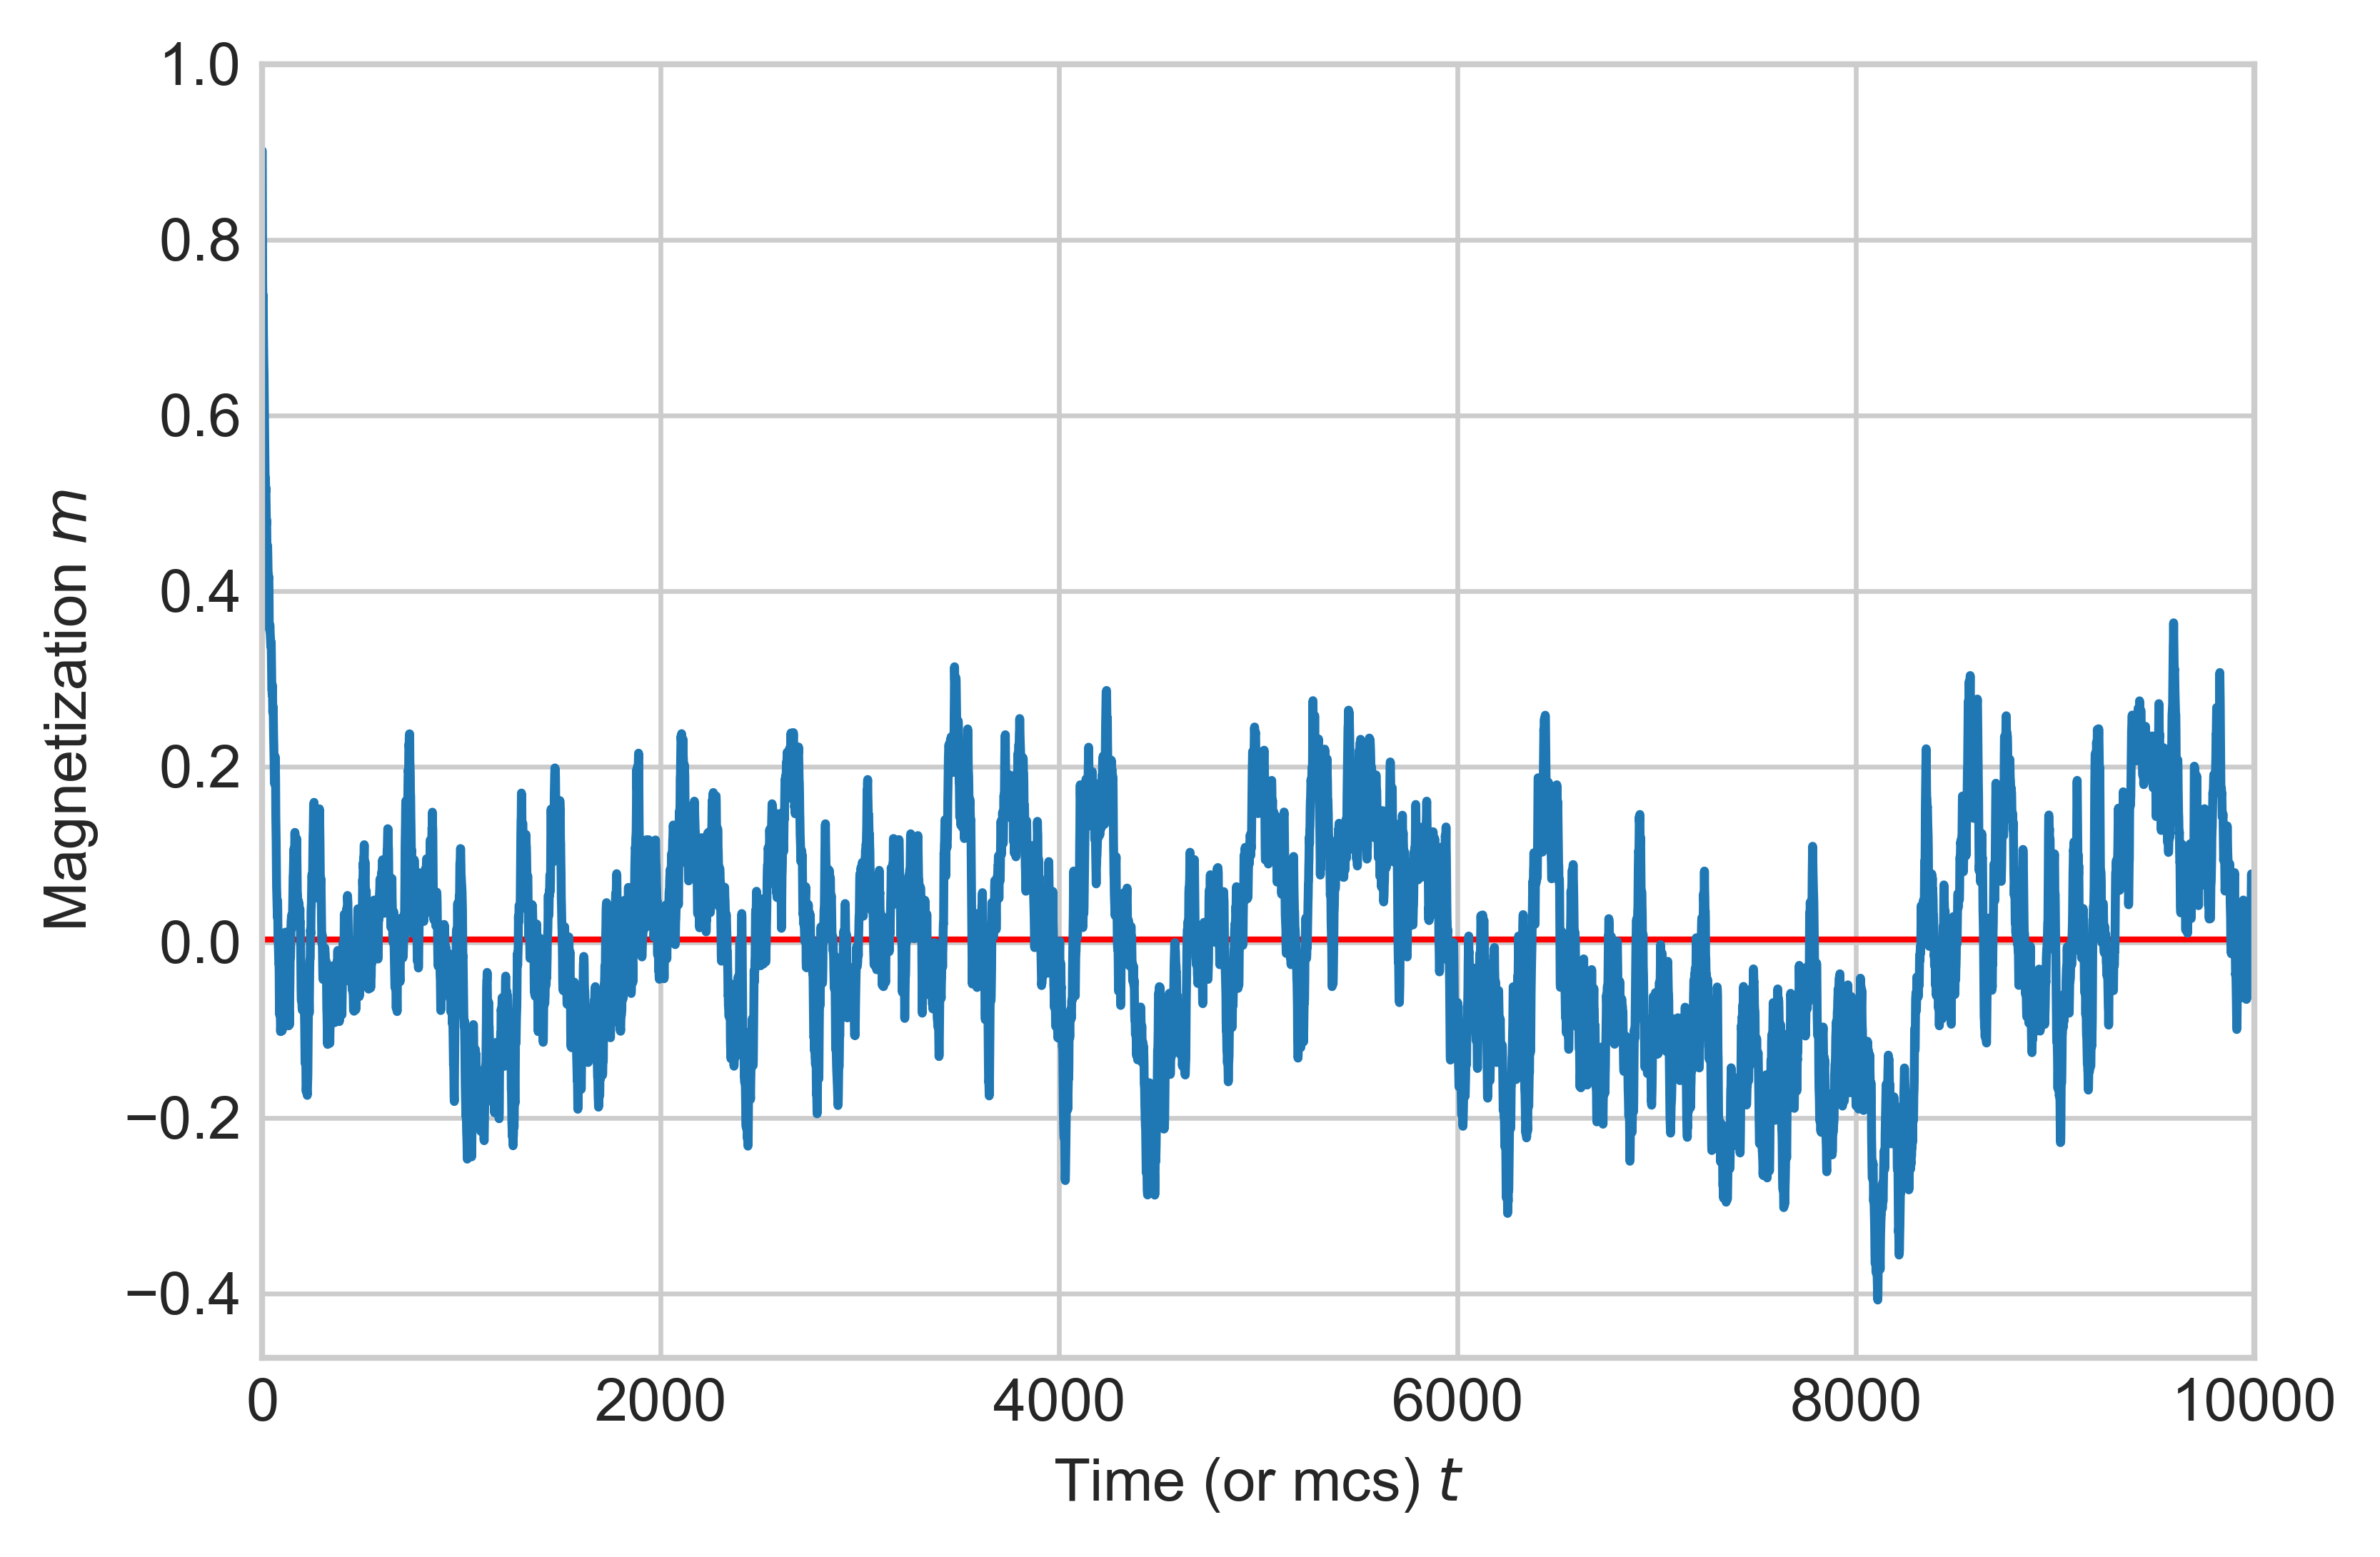

<m> is  0.0031556800000000136


<Figure size 3600x2400 with 0 Axes>

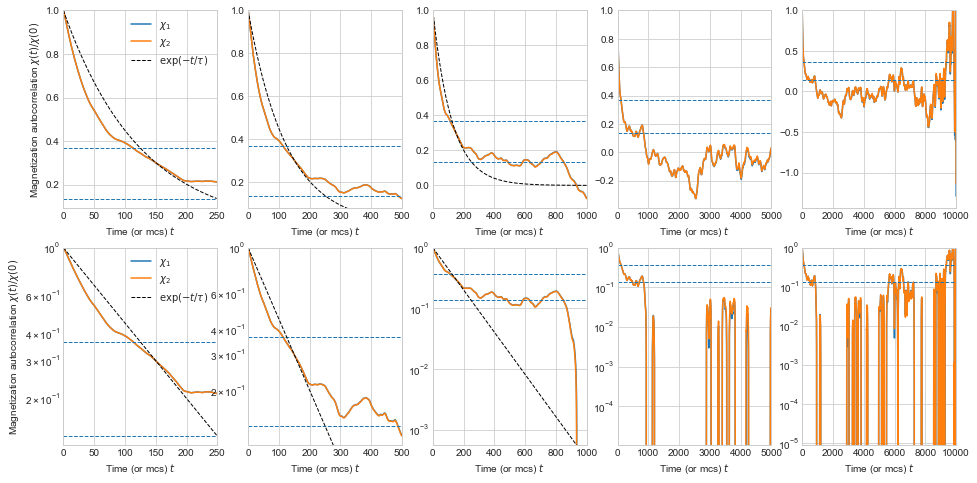

tau is 124.8822930958396


In [31]:
tau_drawer_loading("..\C++\Result\Metropolis_c_Error_100_int25_auto_"+str(2)+".csv")

In [32]:
def FFT_ploting(fmlist):
    ## FFT
    plt.style.use('seaborn-whitegrid')
    plt.plot(np.arange(0,len(fmlist)),fmlist)
    # plt.plot(np.arange(0,epoch),mlist**2)
    plt.axhline(np.average(fmlist))
    plt.show()

    # fmlist = np.append(fmlist,np.array([np.average(fmlist)]*10000))

    length = len(fmlist) # length of list


    mp = (fmlist)[:length] - np.average(fmlist[:length])
    fft_chi = abs(np.fft.fft(mp))**2
    frequency = np.fft.fftfreq(len(mp),1)

    plt.style.use('seaborn-whitegrid')
    plt.plot(frequency,fft_chi)
    plt.show()

    susep = np.average(fmlist[:length]**2)-np.average(fmlist[:length])**2
    print(frequency)
    print(fft_chi)
    print(np.average(fmlist[:length]))
    print(susep)
    print(fft_chi[0]/susep)
    
    #Recover FFT : complex form?

    chi_inv = np.fft.ifft(np.fft.fft(mp))
    plt.plot(np.arange(0,length),chi_inv)
    plt.show()

    chi_inv = np.fft.ifft(fft_chi)
    auto_chi = chi1(fmlist)

    plt.plot(np.arange(0,length),chi_inv.real/max(chi_inv.real))
    plt.plot(np.arange(0,length),auto_chi/auto_chi[0])

    plt.show()


    plt.plot(np.arange(0,400),chi_inv[:400].real/max(chi_inv.real))
    plt.plot(np.arange(0,400),auto_chi[0:400]/auto_chi[0])
    plt.axhline(1/np.e,linestyle='--',lw=1)
    plt.axhline(1/np.e**2,linestyle='--',lw=1)
    plt.show()

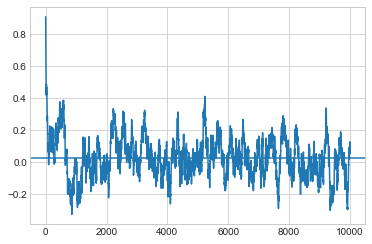

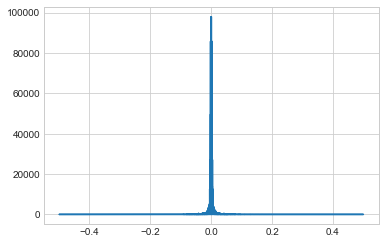

[ 0.      0.0001  0.0002 ... -0.0003 -0.0002 -0.0001]
[1.41651069e-27 5.63140387e+03 1.61219746e+03 ... 1.60118581e+04
 1.61219746e+03 5.63140387e+03]
0.026780400000000003
0.015604954447839998
9.077313834038096e-26


C:\Users\Seongsu\anaconda3\envs\pyenv395\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


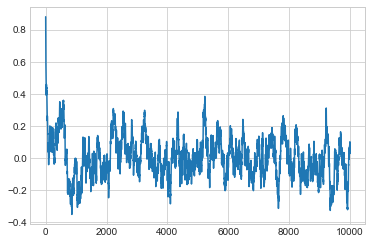

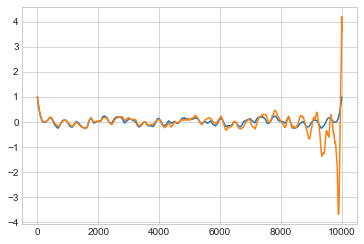

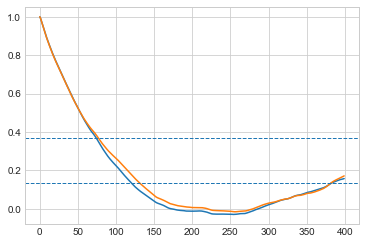

In [33]:
FFT_ploting(mag_fig2)

In [47]:
## FFT를 이용해서 Metropolis algorithms의 tau의 그래프를 그릴 거임

def find_fft_tau_data(num):
    # 1. Data를 받아서 정리하는 영역
    # file_stream = open("..\C++\Result\Autocorrelation\Abs\Metropolis_c_Error_100_int25_auto_"+str(num)+".csv",'r')
    file_stream = open("..\C++\Result\Metropolis_c_Error_100_int25_auto_"+str(num)+".csv",'r')
    lines = file_stream.readlines()
    file_stream.close()
    fft_tau_data = np.array([np.array(line.strip().split(',')[1:],dtype=np.double) for line in lines],dtype=object)

    res = np.zeros(25)
    # 2. Data에 FFT와 IFFT를 가하는 영역
    length = 10000
    for i in range(25):
        tau_data_mp = (fft_tau_data[i])[:length] - np.average(fft_tau_data[i][:length])
        tau_data_fft_chi = abs(np.fft.fft(tau_data_mp))**2
        # frequency = np.fft.fftfreq(len(tau_data_mp),1)
        tau_data_fft_chi_inv = np.fft.ifft(tau_data_fft_chi).real
        tau_data_fft_chi_inv = tau_data_fft_chi_inv/max(tau_data_fft_chi_inv)
        # print(tau_data_fft_chi_inv.shape)


        # 3. Data에서 1/e가 되는 값을 찾음
        e1 = 1/np.e
        for j in range(length):
            if(tau_data_fft_chi_inv[j] < e1):
                tau = j
                res[i] = tau
                break
        # print(tau)
    return res

def plot_chi_time(tau_data_avg, tau_data_dev_sqrt):
    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=600)
    plt.plot(np.linspace(0.2,5,25),tau_data_avg,marker = 's',color='b',label='Teq')
    plt.fill_between(np.linspace(0.2,5,25),tau_data_avg+tau_data_dev_sqrt,tau_data_avg-tau_data_dev_sqrt,alpha=0.4)
    plt.xlim(0,5)
    _, ymax = plt.ylim(None)
    # plt.ylim(-10,350)
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])



    plt.ylabel('equilrbrium step Teq')
    plt.xlabel('Temperature T')

    plt.text(0.05,ymax-6,"100 $\\times$ 100 lattice")
    plt.text(0.06,ymax-11,"20000 steps per site")
    plt.text(0.06,ymax-16,"8 samples of single-spin flip ")
    # plt.text(2.5,183,"185.9$\pm$55")
    plt.text(2.27,-25, '$T_c$', ha='center')
    plt.legend()
    plt.show()

def tau_data_process(num = 8):
    # tau_data = [None]*8
    # for i in range(8):
    #     tau_data[i]= find_fft_tau_data(i)
    tau_data = np.array([find_fft_tau_data(i+1) for i in range(num)])

    # https://ko.wikipedia.org/wiki/%EB%B6%84%EC%82%B0

    tau_data_avg = tau_data.sum(0)/tau_data.shape[0]
    tau_data_dev = (tau_data**2-(np.array([tau_data_avg for i in range(tau_data.shape[0])]))**2).sum(0)/7
    tau_data_dev_sqrt = np.sqrt(tau_data_dev)
    print(tau_data_avg)
    print(tau_data_dev_sqrt)
    return tau_data_avg, tau_data_dev_sqrt

C:\Users\Seongsu\AppData\Local\Temp/ipykernel_11652/3193323783.py:19: RuntimeWarning: invalid value encountered in true_divide
  tau_data_fft_chi_inv = tau_data_fft_chi_inv/max(tau_data_fft_chi_inv)


[ 0.     0.     1.     1.     1.     1.     1.     1.     2.     3.
 28.375 79.125 12.75   6.     4.     3.     2.     2.     2.     2.
  2.     1.25   1.     1.     1.   ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         14.54979136 16.53945499
  0.70710678  0.          0.          0.          0.          0.
  0.          0.          0.          0.46291005  0.          0.
  0.        ]


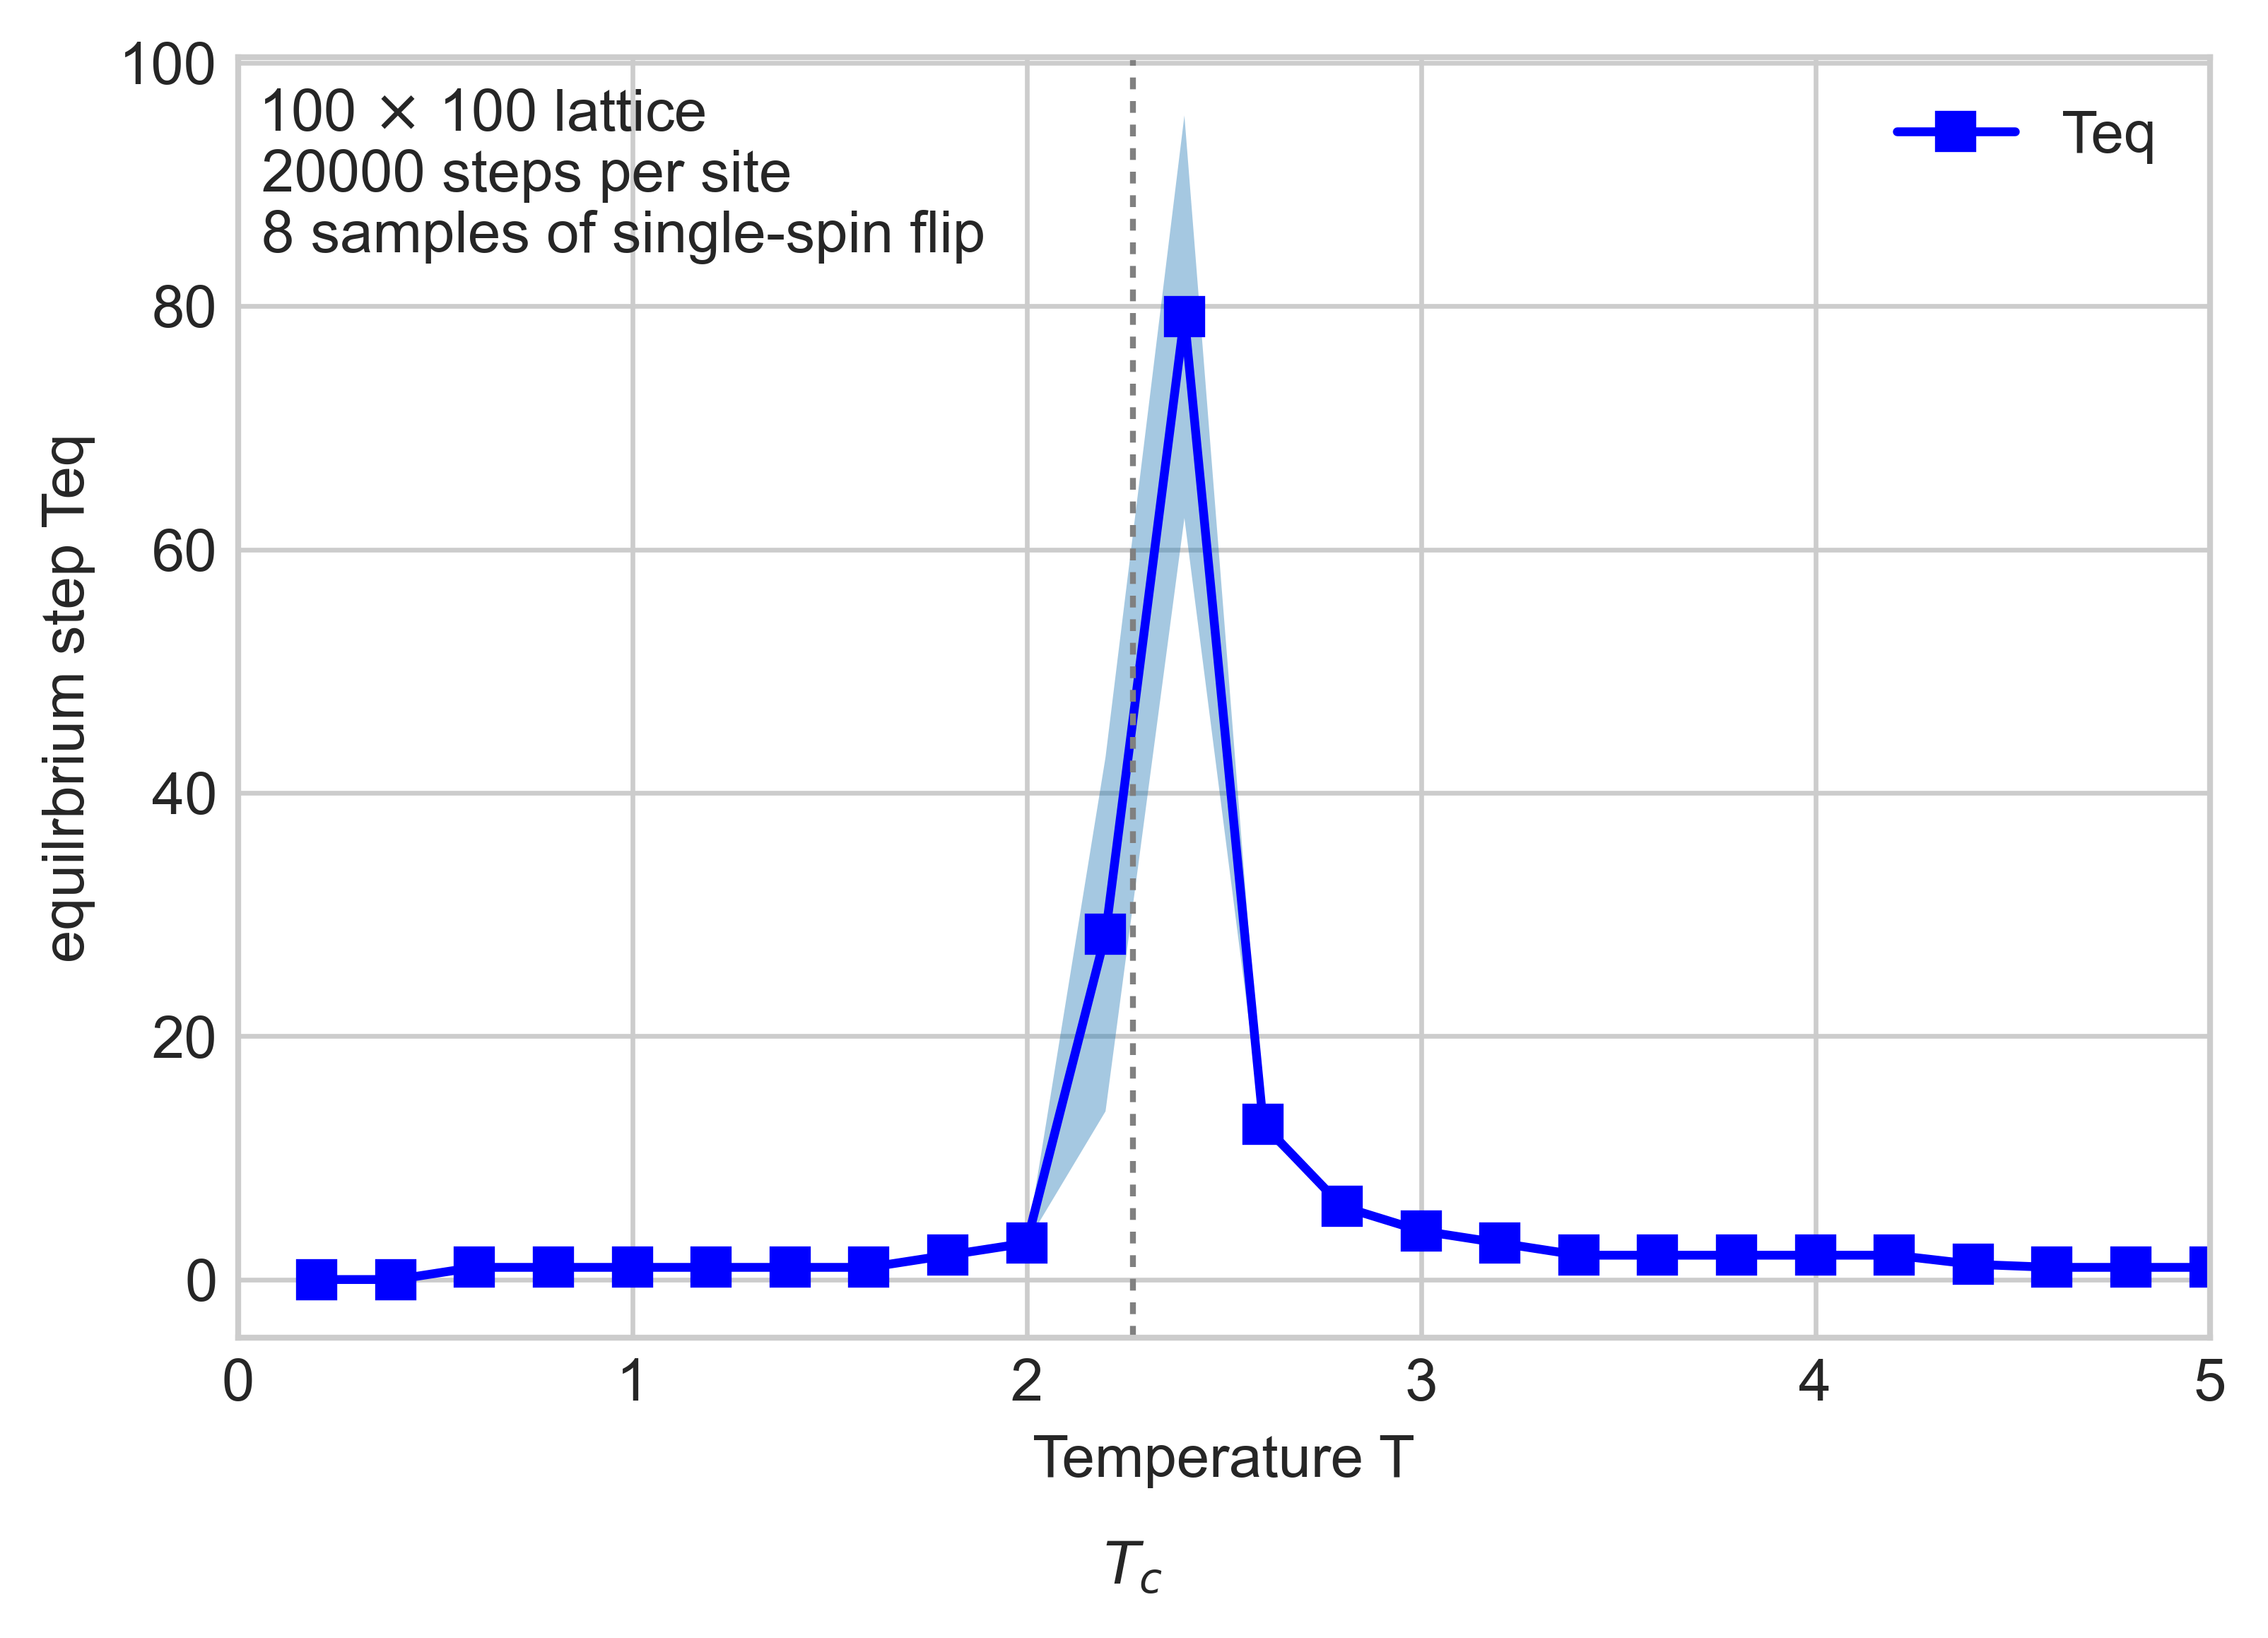

In [49]:
tau_data_avg, tau_data_dev_sqrt = tau_data_process(8)
plot_chi_time(tau_data_avg, tau_data_dev_sqrt)

In [ ]:
# plt.plot(np.arange(0,epoch),mlist)
# plt.axhline(m_expec)
# plt.show()

# _bin2 = 200
# x = np.arange(0,_bin2)
# y = auto_chi[0:_bin2]
# tt, C_p = np.polyfit(x,np.log(y),1,w=np.sqrt(y),cov= True)

# TT = np.vstack([x**(1-i) for i in range(2)]).T
# yi = np.dot(TT,tt)
# C_yi = np.dot(TT,np.dot(C_p,TT.T))
# sig_yi = np.sqrt(np.diag(C_yi))

# slice = [600,1000,5000,10000]
# _bin = slice[0]
# # plt.subplot(2,1,1)
# fig, ax = plt.subplots(1,1)
# # plt.plot(np.arange(0,_bin),auto_chi[0:_bin]/auto_chi[0])
# # plt.plot(np.arange(0,_bin),auto_chi2[0:_bin]/auto_chi2[0])
# ax.fill_between(x, np.exp(yi+sig_yi)/max(np.exp(yi)), np.exp(yi-sig_yi)/max(np.exp(yi)), alpha=.25)
# plt.axhline(1/np.e,linestyle='--',lw=1)
# plt.axhline(1/np.e**2,linestyle='--',lw=1)
# plt.plot(x,np.exp(yi)/max(np.exp(yi)))